# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
# env = UnityEnvironment(file_name="/home/arasdar/VisualBanana_Linux/Banana.x86")
env = UnityEnvironment(file_name="/home/arasdar/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
# print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
# print(state.shape, len(env_info.vector_observations), env_info.vector_observations.shape)

Number of agents: 1
Number of actions: 4
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        print(state.shape)
        break
    
print("Score: {}".format(score))

(37,)
Score: 0.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(state)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 3.0


In [8]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


In [9]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
batch = []
while True: # infinite number of steps
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    #print(state, action, reward, done)
    batch.append([action, state, reward, done])
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
# print("Score: {}".format(score))

In [10]:
batch[0], batch[0][1].shape

([0, array([1.        , 0.        , 0.        , 0.        , 0.41103721,
         0.        , 1.        , 0.        , 0.        , 0.40960541,
         0.        , 0.        , 1.        , 0.        , 0.04057696,
         1.        , 0.        , 0.        , 0.        , 0.253993  ,
         0.        , 1.        , 0.        , 0.        , 0.30345654,
         1.        , 0.        , 0.        , 0.        , 0.19119175,
         0.        , 1.        , 0.        , 0.        , 0.3996276 ,
         0.        , 0.        ]), 0.0, False], (37,))

In [11]:
batch[0][1].shape

(37,)

In [12]:
batch[0]

[0, array([1.        , 0.        , 0.        , 0.        , 0.41103721,
        0.        , 1.        , 0.        , 0.        , 0.40960541,
        0.        , 0.        , 1.        , 0.        , 0.04057696,
        1.        , 0.        , 0.        , 0.        , 0.253993  ,
        0.        , 1.        , 0.        , 0.        , 0.30345654,
        1.        , 0.        , 0.        , 0.        , 0.19119175,
        0.        , 1.        , 0.        , 0.        , 0.3996276 ,
        0.        , 0.        ]), 0.0, False]

In [13]:
actions = np.array([each[0] for each in batch])
states = np.array([each[1] for each in batch])
rewards = np.array([each[2] for each in batch])
dones = np.array([each[3] for each in batch])
# infos = np.array([each[4] for each in batch])

In [14]:
# print(rewards[:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)), 
      (np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

(300,) (300, 37) (300,) (300,)
float64 float64 int64 bool
3 0 4
0.0 -1.0
10.86185359954834 -10.663532257080078


In [15]:
# Data of the model
def model_input(state_size):
    states = tf.placeholder(tf.float32, [None, state_size], name='states')
    actions = tf.placeholder(tf.int32, [None], name='actions')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    reward = tf.placeholder(tf.float32, [], name='reward')
    return states, actions, targetQs, reward

In [16]:
# Generator/Controller: Generating/prediting the actions
def generator(states, action_size, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        h1 = tf.layers.dense(inputs=states, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=action_size)        
        #predictions = tf.nn.softmax(logits)

        # return actions logits
        return logits

In [17]:
# Discriminator/Dopamine: Reward function/planner/naviator/advisor/supervisor/cortical columns
def discriminator(states, actions, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('discriminator', reuse=reuse):
        # Fusion/merge states and actions/ SA/ SM
        x_fused = tf.concat(axis=1, values=[states, actions])
        
        # First fully connected layer
        h1 = tf.layers.dense(inputs=x_fused, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=1)        
        #predictions = tf.nn.softmax(logits)

        # return rewards logits
        return logits

In [19]:
def model_loss(action_size, hidden_size, states, actions, targetQs, reward):
    # G
    actions_logits = generator(states=states, hidden_size=hidden_size, action_size=action_size)
    actions_labels = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    neg_log_prob_actions = tf.nn.softmax_cross_entropy_with_logits_v2(logits=actions_logits, 
                                                                      labels=actions_labels)
    g_loss = tf.reduce_mean(neg_log_prob_actions[:-1] * targetQs[1:])
    
    # D
    Qs_logits = discriminator(actions=actions_logits, hidden_size=hidden_size, states=states)
    rewards = reward*tf.ones_like(Qs_logits)
    d_lossR = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Qs_logits,
                                                                     labels=tf.nn.sigmoid(rewards)))
    targetQs = tf.reshape(targetQs, shape=[-1, 1])
    d_lossQ = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Qs_logits[:-1],
                                                                     labels=tf.nn.sigmoid(targetQs[1:])))
    d_loss = d_lossR + d_lossQ

    return actions_logits, Qs_logits, g_loss, d_loss, d_lossR, d_lossQ, tf.nn.sigmoid(reward)

In [20]:
# Optimizating/training/learning G & D
def model_opt(g_loss, d_loss, learning_rate):
    """
    Get optimization operations in order
    :param g_loss: Generator loss Tensor for action prediction
    :param d_loss: Discriminator loss Tensor for reward prediction for generated/prob/logits action
    :param learning_rate: Learning Rate Placeholder
    :return: A tuple of (qfunction training, generator training, discriminator training)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        g_opt = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)
        d_opt = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)

    return g_opt, d_opt

In [22]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, learning_rate):

        # Data of the Model: make the data available inside the framework
        self.states, self.actions, self.targetQs, self.reward = model_input(state_size=state_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.Qs_logits, self.g_loss, self.d_loss, self.d_lossR, self.d_lossQ, self.sigm_reward = model_loss(
            action_size=action_size, hidden_size=hidden_size, # model init parameters
            states=self.states, actions=self.actions, # model input
            targetQs=self.targetQs, reward=self.reward) # model input
        
        # Update the model: backward pass and backprop
        self.g_opt, self.d_opt = model_opt(g_loss=self.g_loss, d_loss=self.d_loss, learning_rate=learning_rate)

In [23]:
print('state size:{}'.format(states.shape), 
      'actions:{}'.format(actions.shape)) 
print('action size:{}'.format(np.max(actions) - np.min(actions)+1))

state size:(300, 37) actions:(300,)
action size:4


In [24]:
# Training parameters
# Network parameters
state_size = 37              # number of units for the input state/observation -- simulation
action_size = 4              # number of units for the output actions -- simulation
hidden_size = 37*16          # number of units in each Q-network hidden layer -- simulation
learning_rate = 0.001          # learning rate for adam

In [25]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, hidden_size=hidden_size, state_size=state_size, learning_rate=learning_rate)

In [26]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment

while True: # infinite number of steps
#for _ in range(batch_size):
    state = env_info.vector_observations[0]   # get the next state
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    #memory.buffer.append([action, state, done])
    if done:                                       # exit loop if episode finished
        break

In [ ]:
from collections import deque
episodes_total_reward = deque(maxlen=100) # 100 episodes average/running average/running mean/window
saver = tf.train.Saver()
rewards_list, g_loss_list, d_loss_list = [], [], []
d_lossR_list, d_lossQ_list = [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Training episodes/epochs
    for ep in range(111111):
        batch = [] # every data batch
        total_reward = 0
        #state = env.reset() # env first state
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment

        # Training steps/batches
        while True:
            state = env_info.vector_observations[0]   # get the next state
            action_logits, Q_logits = sess.run(fetches=[model.actions_logits, model.Qs_logits], 
                                               feed_dict={model.states: np.reshape(state, [1, -1])})
            action = np.argmax(action_logits)
            batch.append([state, action, Q_logits])
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            total_reward += reward
            if done is True: # episode ended success/failure
                episodes_total_reward.append(total_reward) # stopping criteria
                #rate = total_reward/ 500 # success is 500 points
                rate = total_reward/ +13 # success is 13; it can be neg and pos
                break

        # Training using batches
        #batch = memory.buffer
        states = np.array([each[0] for each in batch])
        actions = np.array([each[1] for each in batch])
        targetQs = np.array([each[2] for each in batch])
        g_loss, d_loss, d_lossR, d_lossQ, sigm_reward, _, _ = sess.run([model.g_loss, model.d_loss,
                                                                        model.d_lossR, model.d_lossQ, 
                                                                        model.sigm_reward,
                                                                        model.g_opt, model.d_opt],
                                                                       feed_dict = {model.states: states, 
                                                                                    model.actions: actions,
                                                                                    model.reward: rate,
                                                                    model.targetQs: targetQs.reshape([-1])})
        # Average 100 episode total reward
        # Print out
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episodes_total_reward)),
              'rate:{:.4f}'.format(sigm_reward),
              'gloss:{:.4f}'.format(g_loss),
              'dloss:{:.4f}'.format(d_loss),
              'dlossR:{:.4f}'.format(d_lossR),
              'dlossQ:{:.4f}'.format(d_lossQ))
        # Ploting out
        rewards_list.append([ep, np.mean(episodes_total_reward)])
        g_loss_list.append([ep, g_loss])
        d_loss_list.append([ep, d_loss])
        d_lossR_list.append([ep, d_lossR])
        d_lossQ_list.append([ep, d_lossQ])
        # Break episode/epoch loop
        if np.mean(episodes_total_reward) >= +13:
            #break
            print('Won!')
            
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints-nav/model.ckpt')

Episode:0 meanR:0.0000 rate:0.5000 gloss:-0.1643 dloss:1.3900 dlossR:0.6963 dlossQ:0.6937
Episode:1 meanR:1.0000 rate:0.5384 gloss:0.6558 dloss:1.4638 dlossR:0.9769 dlossQ:0.4869
Episode:2 meanR:0.6667 rate:0.5000 gloss:-0.1522 dloss:1.3866 dlossR:0.6951 dlossQ:0.6915
Episode:3 meanR:0.7500 rate:0.5192 gloss:-0.1091 dloss:1.4126 dlossR:0.8106 dlossQ:0.6021
Episode:4 meanR:0.8000 rate:0.5192 gloss:-0.0463 dloss:1.3883 dlossR:0.6975 dlossQ:0.6908
Episode:5 meanR:0.3333 rate:0.4616 gloss:0.1659 dloss:1.3941 dlossR:0.7086 dlossQ:0.6856
Episode:6 meanR:0.2857 rate:0.5000 gloss:0.1122 dloss:1.3898 dlossR:0.7114 dlossQ:0.6785
Episode:7 meanR:0.5000 rate:0.5384 gloss:-0.0026 dloss:1.3870 dlossR:0.7326 dlossQ:0.6544
Episode:8 meanR:0.4444 rate:0.5000 gloss:0.0248 dloss:1.3892 dlossR:0.7079 dlossQ:0.6814
Episode:9 meanR:0.3000 rate:0.4808 gloss:-0.0439 dloss:1.3920 dlossR:0.7224 dlossQ:0.6696
Episode:10 meanR:0.3636 rate:0.5192 gloss:-0.0138 dloss:1.3869 dlossR:0.6941 dlossQ:0.6927
Episode:11 me

Episode:91 meanR:0.0761 rate:0.4616 gloss:0.0001 dloss:1.3902 dlossR:0.7020 dlossQ:0.6882
Episode:92 meanR:0.0753 rate:0.5000 gloss:-0.0008 dloss:1.3864 dlossR:0.6956 dlossQ:0.6908
Episode:93 meanR:0.0745 rate:0.5000 gloss:-0.0006 dloss:1.3863 dlossR:0.6933 dlossQ:0.6931
Episode:94 meanR:0.0842 rate:0.5192 gloss:-0.0027 dloss:1.3889 dlossR:0.6980 dlossQ:0.6909
Episode:95 meanR:0.0833 rate:0.5000 gloss:-0.0029 dloss:1.3863 dlossR:0.6960 dlossQ:0.6903
Episode:96 meanR:0.0722 rate:0.4808 gloss:0.0487 dloss:1.3892 dlossR:0.7048 dlossQ:0.6844
Episode:97 meanR:0.0816 rate:0.5192 gloss:-0.0024 dloss:1.3886 dlossR:0.6973 dlossQ:0.6913
Episode:98 meanR:0.0808 rate:0.5000 gloss:-0.0012 dloss:1.3863 dlossR:0.6939 dlossQ:0.6924
Episode:99 meanR:0.0800 rate:0.5000 gloss:-0.0004 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:100 meanR:0.0700 rate:0.4808 gloss:-0.0001 dloss:1.3872 dlossR:0.6953 dlossQ:0.6919
Episode:101 meanR:0.0500 rate:0.5000 gloss:0.0004 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927


Episode:181 meanR:0.0300 rate:0.5000 gloss:0.0003 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:182 meanR:0.0500 rate:0.5192 gloss:0.0003 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:183 meanR:0.0500 rate:0.5000 gloss:0.0005 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:184 meanR:0.0300 rate:0.4808 gloss:0.0006 dloss:1.3877 dlossR:0.6953 dlossQ:0.6924
Episode:185 meanR:0.0600 rate:0.5000 gloss:0.0007 dloss:1.3863 dlossR:0.6943 dlossQ:0.6920
Episode:186 meanR:0.0900 rate:0.5192 gloss:0.0001 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:187 meanR:0.0500 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:188 meanR:0.0800 rate:0.5192 gloss:-0.0002 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:189 meanR:0.0800 rate:0.5000 gloss:-0.0002 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:190 meanR:0.0500 rate:0.4616 gloss:-0.0001 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:191 meanR:0.0800 rate:0.5192 gloss:-0.0001 dloss:1.3867 dlossR:0.6937 dlossQ:0.

Episode:271 meanR:-0.0300 rate:0.5384 gloss:-0.0006 dloss:1.3892 dlossR:0.6968 dlossQ:0.6924
Episode:272 meanR:-0.0100 rate:0.5000 gloss:-0.0006 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:273 meanR:0.0000 rate:0.5192 gloss:-0.0003 dloss:1.3869 dlossR:0.6939 dlossQ:0.6929
Episode:274 meanR:0.0000 rate:0.5000 gloss:-0.0004 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:275 meanR:-0.0200 rate:0.4616 gloss:0.0001 dloss:1.3879 dlossR:0.6955 dlossQ:0.6923
Episode:276 meanR:-0.0300 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:277 meanR:-0.0400 rate:0.5000 gloss:0.0002 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:278 meanR:-0.0600 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:279 meanR:-0.0500 rate:0.5192 gloss:-0.0002 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:280 meanR:-0.0500 rate:0.5000 gloss:-0.0002 dloss:1.3863 dlossR:0.6939 dlossQ:0.6925
Episode:281 meanR:-0.0400 rate:0.5192 gloss:-0.0001 dloss:1.3872 dlossR:0.69

Episode:360 meanR:-0.1600 rate:0.5000 gloss:-0.0014 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:361 meanR:-0.1600 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:362 meanR:-0.1700 rate:0.4808 gloss:0.0003 dloss:1.3869 dlossR:0.6940 dlossQ:0.6929
Episode:363 meanR:-0.1600 rate:0.5000 gloss:0.0006 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:364 meanR:-0.1600 rate:0.5000 gloss:0.0005 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:365 meanR:-0.1500 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:366 meanR:-0.1400 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:367 meanR:-0.1500 rate:0.5000 gloss:-0.0007 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:368 meanR:-0.1600 rate:0.4808 gloss:0.0003 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:369 meanR:-0.1400 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:370 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.693

Episode:449 meanR:0.1300 rate:0.4808 gloss:0.0003 dloss:1.3873 dlossR:0.6946 dlossQ:0.6928
Episode:450 meanR:0.1300 rate:0.5000 gloss:-0.0011 dloss:1.3863 dlossR:0.6940 dlossQ:0.6923
Episode:451 meanR:0.1400 rate:0.5192 gloss:0.0001 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:452 meanR:0.1800 rate:0.5574 gloss:0.0001 dloss:1.3844 dlossR:0.6915 dlossQ:0.6929
Episode:453 meanR:0.1900 rate:0.5192 gloss:0.0002 dloss:1.3853 dlossR:0.6927 dlossQ:0.6926
Episode:454 meanR:0.1800 rate:0.5000 gloss:0.0002 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:455 meanR:0.1700 rate:0.4808 gloss:0.0001 dloss:1.3874 dlossR:0.6950 dlossQ:0.6924
Episode:456 meanR:0.1900 rate:0.5000 gloss:0.0002 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:457 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:458 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:459 meanR:0.1800 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.69

Episode:539 meanR:0.0900 rate:0.5192 gloss:0.0001 dloss:1.3855 dlossR:0.6926 dlossQ:0.6929
Episode:540 meanR:0.1000 rate:0.5192 gloss:0.0001 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:541 meanR:0.1000 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:542 meanR:0.1000 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:543 meanR:0.1000 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:544 meanR:0.0800 rate:0.4808 gloss:-0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:545 meanR:0.0900 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:546 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:547 meanR:0.0700 rate:0.4616 gloss:-0.0001 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:548 meanR:0.0700 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:549 meanR:0.0800 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0

Episode:629 meanR:0.0900 rate:0.5192 gloss:0.0000 dloss:1.3853 dlossR:0.6939 dlossQ:0.6915
Episode:630 meanR:0.0900 rate:0.5000 gloss:0.0001 dloss:1.3864 dlossR:0.6948 dlossQ:0.6916
Episode:631 meanR:0.0900 rate:0.5000 gloss:0.0001 dloss:1.3864 dlossR:0.6943 dlossQ:0.6920
Episode:632 meanR:0.0900 rate:0.5000 gloss:0.0001 dloss:1.3864 dlossR:0.6939 dlossQ:0.6924
Episode:633 meanR:0.0500 rate:0.4426 gloss:0.0001 dloss:1.3919 dlossR:0.7012 dlossQ:0.6906
Episode:634 meanR:0.0600 rate:0.5384 gloss:-0.0000 dloss:1.3858 dlossR:0.6930 dlossQ:0.6929
Episode:635 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:636 meanR:0.0800 rate:0.5192 gloss:-0.0000 dloss:1.3866 dlossR:0.6936 dlossQ:0.6930
Episode:637 meanR:0.0900 rate:0.5192 gloss:-0.0000 dloss:1.3870 dlossR:0.6943 dlossQ:0.6927
Episode:638 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:639 meanR:0.0800 rate:0.5000 gloss:0.0004 dloss:1.3863 dlossR:0.6935 dlossQ:0.6

Episode:719 meanR:0.0300 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:720 meanR:0.0300 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:721 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6940 dlossQ:0.6920
Episode:722 meanR:0.0300 rate:0.5192 gloss:-0.0000 dloss:1.3868 dlossR:0.6939 dlossQ:0.6928
Episode:723 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:724 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:725 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:726 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6929 dlossQ:0.6927
Episode:727 meanR:0.0500 rate:0.5384 gloss:0.0001 dloss:1.3840 dlossR:0.6919 dlossQ:0.6921
Episode:728 meanR:0.0100 rate:0.4426 gloss:0.0001 dloss:1.3892 dlossR:0.6967 dlossQ:0.6926
Episode:729 meanR:0.0000 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6937 dlossQ:0.6

Episode:808 meanR:-0.0500 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:809 meanR:-0.0100 rate:0.5574 gloss:-0.0000 dloss:1.3867 dlossR:0.6937 dlossQ:0.6930
Episode:810 meanR:0.0000 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:811 meanR:-0.0100 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:812 meanR:0.0000 rate:0.5192 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:813 meanR:0.0300 rate:0.5000 gloss:-0.0003 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:814 meanR:0.0500 rate:0.5384 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:815 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6930
Episode:816 meanR:0.0700 rate:0.5192 gloss:0.0001 dloss:1.3855 dlossR:0.6926 dlossQ:0.6928
Episode:817 meanR:0.0800 rate:0.5192 gloss:0.0001 dloss:1.3851 dlossR:0.6926 dlossQ:0.6926
Episode:818 meanR:0.0700 rate:0.4808 gloss:0.0001 dloss:1.3875 dlossR:0.6948 dloss

Episode:898 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:899 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:900 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:901 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:902 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:903 meanR:0.0200 rate:0.5192 gloss:0.0001 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:904 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:905 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6930
Episode:906 meanR:0.0400 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:907 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:908 meanR:0.0600 rate:0.5192 gloss:0.0001 dloss:1.3856 dlossR:0.6926 dlossQ:0.693

Episode:987 meanR:-0.0400 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:988 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:989 meanR:-0.0400 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:990 meanR:-0.0500 rate:0.4808 gloss:0.0001 dloss:1.3868 dlossR:0.6938 dlossQ:0.6930
Episode:991 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:992 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:993 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:994 meanR:-0.0400 rate:0.5192 gloss:-0.0000 dloss:1.3870 dlossR:0.6944 dlossQ:0.6927
Episode:995 meanR:-0.0600 rate:0.4808 gloss:-0.0000 dloss:1.3859 dlossR:0.6930 dlossQ:0.6929
Episode:996 meanR:-0.0500 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:997 meanR:-0.0400 rate:0.5192 gloss:-0.0000 dloss:1.3866 dlossR:0.693

Episode:1076 meanR:-0.0400 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:1077 meanR:-0.0300 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:1078 meanR:-0.0600 rate:0.5000 gloss:-0.0004 dloss:1.3863 dlossR:0.6949 dlossQ:0.6915
Episode:1079 meanR:-0.0700 rate:0.5192 gloss:-0.0001 dloss:1.3873 dlossR:0.6947 dlossQ:0.6926
Episode:1080 meanR:-0.0700 rate:0.5000 gloss:-0.0002 dloss:1.3863 dlossR:0.6937 dlossQ:0.6926
Episode:1081 meanR:-0.0700 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:1082 meanR:-0.0700 rate:0.5192 gloss:-0.0001 dloss:1.3871 dlossR:0.6942 dlossQ:0.6929
Episode:1083 meanR:-0.0900 rate:0.4616 gloss:-0.0001 dloss:1.3854 dlossR:0.6924 dlossQ:0.6931
Episode:1084 meanR:-0.0700 rate:0.5384 gloss:-0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:1085 meanR:-0.0800 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1086 meanR:-0.0800 rate:0.5000 gloss:-0.0000 dloss:1

Episode:1164 meanR:-0.1100 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1165 meanR:-0.1200 rate:0.4808 gloss:-0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6930
Episode:1166 meanR:-0.1400 rate:0.4616 gloss:-0.0002 dloss:1.3851 dlossR:0.6921 dlossQ:0.6930
Episode:1167 meanR:-0.1600 rate:0.4616 gloss:-0.0001 dloss:1.3850 dlossR:0.6921 dlossQ:0.6929
Episode:1168 meanR:-0.1600 rate:0.4808 gloss:-0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:1169 meanR:-0.1400 rate:0.5192 gloss:-0.0002 dloss:1.3872 dlossR:0.6943 dlossQ:0.6929
Episode:1170 meanR:-0.1200 rate:0.5000 gloss:-0.0002 dloss:1.3863 dlossR:0.6935 dlossQ:0.6927
Episode:1171 meanR:-0.1100 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:1172 meanR:-0.1100 rate:0.4808 gloss:-0.0002 dloss:1.3850 dlossR:0.6928 dlossQ:0.6922
Episode:1173 meanR:-0.1200 rate:0.4808 gloss:-0.0003 dloss:1.3853 dlossR:0.6925 dlossQ:0.6927
Episode:1174 meanR:-0.1100 rate:0.5000 gloss:-0.0002 dloss:1

Episode:1252 meanR:-0.1200 rate:0.5000 gloss:0.0003 dloss:1.3863 dlossR:0.6939 dlossQ:0.6924
Episode:1253 meanR:-0.1100 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:1254 meanR:-0.1100 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1255 meanR:-0.1200 rate:0.4808 gloss:0.0002 dloss:1.3872 dlossR:0.6943 dlossQ:0.6929
Episode:1256 meanR:-0.1000 rate:0.5384 gloss:0.0000 dloss:1.3855 dlossR:0.6924 dlossQ:0.6931
Episode:1257 meanR:-0.0800 rate:0.5192 gloss:0.0001 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:1258 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:1259 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1260 meanR:-0.0600 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:1261 meanR:-0.0600 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1262 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3861 dloss

Episode:1340 meanR:-0.0700 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1341 meanR:-0.0900 rate:0.4616 gloss:-0.0001 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:1342 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1343 meanR:-0.0900 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1344 meanR:-0.1000 rate:0.4808 gloss:-0.0001 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:1345 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1346 meanR:-0.1000 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1347 meanR:-0.1200 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:1348 meanR:-0.1300 rate:0.5384 gloss:-0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6930
Episode:1349 meanR:-0.1100 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1350 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.38

Episode:1428 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:1429 meanR:0.0600 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1430 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1431 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6931
Episode:1432 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1433 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:1434 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1435 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1436 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1437 meanR:0.0700 rate:0.5192 gloss:-0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:1438 meanR:0.0700 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 

Episode:1517 meanR:-0.0400 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1518 meanR:-0.0400 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:1519 meanR:-0.0400 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:1520 meanR:-0.0400 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:1521 meanR:-0.0400 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1522 meanR:-0.0400 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1523 meanR:-0.0500 rate:0.4616 gloss:-0.0001 dloss:1.3855 dlossR:0.6925 dlossQ:0.6931
Episode:1524 meanR:-0.0600 rate:0.4808 gloss:-0.0001 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:1525 meanR:-0.0600 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1526 meanR:-0.0600 rate:0.4808 gloss:-0.0001 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:1527 meanR:-0.0600 rate:0.4808 gloss:-0.0000 dloss:1

Episode:1605 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1606 meanR:-0.1100 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1607 meanR:-0.1100 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:1608 meanR:-0.0900 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1609 meanR:-0.0700 rate:0.5384 gloss:-0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:1610 meanR:-0.0600 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1611 meanR:-0.0500 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:1612 meanR:-0.0700 rate:0.4616 gloss:-0.0001 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:1613 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:1614 meanR:-0.0700 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:1615 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1.386

Episode:1694 meanR:0.1100 rate:0.5192 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1695 meanR:0.1300 rate:0.5384 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1696 meanR:0.1400 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1697 meanR:0.1500 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1698 meanR:0.1300 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:1699 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:1700 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1701 meanR:0.1500 rate:0.5384 gloss:0.0001 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:1702 meanR:0.1600 rate:0.5384 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6929
Episode:1703 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:1704 meanR:0.1800 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.693

Episode:1783 meanR:0.1000 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1784 meanR:0.1000 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:1785 meanR:0.0900 rate:0.5000 gloss:-0.0002 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1786 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1787 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1788 meanR:0.1400 rate:0.5384 gloss:0.0000 dloss:1.3850 dlossR:0.6921 dlossQ:0.6930
Episode:1789 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1790 meanR:0.1200 rate:0.4808 gloss:0.0000 dloss:1.3871 dlossR:0.6942 dlossQ:0.6929
Episode:1791 meanR:0.1200 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dlossQ:0.6930
Episode:1792 meanR:0.1400 rate:0.5192 gloss:0.0003 dloss:1.3858 dlossR:0.6928 dlossQ:0.6930
Episode:1793 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3854 dlossR:0.6926 d

Episode:1872 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1873 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1874 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1875 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1876 meanR:0.2100 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:1877 meanR:0.2300 rate:0.5384 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1878 meanR:0.2300 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1879 meanR:0.2100 rate:0.4616 gloss:-0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:1880 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:1881 meanR:0.2000 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1882 meanR:0.2000 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6

Episode:1960 meanR:-0.0700 rate:0.4808 gloss:-0.0001 dloss:1.3859 dlossR:0.6930 dlossQ:0.6929
Episode:1961 meanR:-0.0700 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1962 meanR:-0.0400 rate:0.5574 gloss:-0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:1963 meanR:-0.0500 rate:0.5000 gloss:-0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1964 meanR:-0.0600 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1965 meanR:-0.0900 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:1966 meanR:-0.0800 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:1967 meanR:-0.1200 rate:0.4426 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:1968 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:1969 meanR:-0.0800 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:1970 meanR:-0.0800 rate:0.5192 gloss:-0.0000 dloss:1.3

Episode:2048 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:2049 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6929
Episode:2050 meanR:0.0400 rate:0.4808 gloss:0.0001 dloss:1.3871 dlossR:0.6942 dlossQ:0.6929
Episode:2051 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2052 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:2053 meanR:0.0600 rate:0.5192 gloss:0.0003 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:2054 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6937 dlossQ:0.6931
Episode:2055 meanR:0.0600 rate:0.5192 gloss:0.0003 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:2056 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2057 meanR:0.0800 rate:0.5192 gloss:-0.0001 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:2058 meanR:0.0700 rate:0.4808 gloss:-0.0001 dloss:1.3865 dlossR:0.6934 

Episode:2137 meanR:0.2300 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:2138 meanR:0.2400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:2139 meanR:0.2400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:2140 meanR:0.2300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:2141 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:2142 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2143 meanR:0.2000 rate:0.4616 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:2144 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2145 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2146 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:2147 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:2226 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2227 meanR:0.3600 rate:0.5384 gloss:0.0000 dloss:1.3846 dlossR:0.6918 dlossQ:0.6928
Episode:2228 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2229 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6929
Episode:2230 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6937 dlossQ:0.6926
Episode:2231 meanR:0.3500 rate:0.4808 gloss:0.0000 dloss:1.3870 dlossR:0.6941 dlossQ:0.6930
Episode:2232 meanR:0.3600 rate:0.5384 gloss:0.0000 dloss:1.3846 dlossR:0.6918 dlossQ:0.6929
Episode:2233 meanR:0.3900 rate:0.5192 gloss:0.0001 dloss:1.3854 dlossR:0.6926 dlossQ:0.6928
Episode:2234 meanR:0.4000 rate:0.5192 gloss:0.0001 dloss:1.3855 dlossR:0.6926 dlossQ:0.6929
Episode:2235 meanR:0.3900 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:2236 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dl

Episode:2315 meanR:0.4300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:2316 meanR:0.4500 rate:0.5384 gloss:0.0000 dloss:1.3846 dlossR:0.6917 dlossQ:0.6929
Episode:2317 meanR:0.4600 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6929
Episode:2318 meanR:0.4700 rate:0.5384 gloss:0.0000 dloss:1.3848 dlossR:0.6918 dlossQ:0.6930
Episode:2319 meanR:0.4800 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6930
Episode:2320 meanR:0.4400 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dlossQ:0.6930
Episode:2321 meanR:0.4400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:2322 meanR:0.4300 rate:0.4808 gloss:0.0000 dloss:1.3872 dlossR:0.6944 dlossQ:0.6928
Episode:2323 meanR:0.4400 rate:0.5192 gloss:0.0000 dloss:1.3854 dlossR:0.6925 dlossQ:0.6929
Episode:2324 meanR:0.4400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2325 meanR:0.4200 rate:0.4808 gloss:0.0000 dloss:1.3871 dlossR:0.6942 dl

Episode:2404 meanR:0.1700 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:2405 meanR:0.1700 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:2406 meanR:0.1600 rate:0.4808 gloss:-0.0000 dloss:1.3852 dlossR:0.6930 dlossQ:0.6922
Episode:2407 meanR:0.1400 rate:0.4808 gloss:-0.0000 dloss:1.3853 dlossR:0.6928 dlossQ:0.6925
Episode:2408 meanR:0.1500 rate:0.5384 gloss:-0.0000 dloss:1.3873 dlossR:0.6942 dlossQ:0.6930
Episode:2409 meanR:0.1200 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2410 meanR:0.1200 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2411 meanR:0.1200 rate:0.5192 gloss:-0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:2412 meanR:0.1400 rate:0.5192 gloss:-0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:2413 meanR:0.1400 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2414 meanR:0.1500 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR

Episode:2493 meanR:0.1400 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:2494 meanR:0.1900 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:2495 meanR:0.2000 rate:0.5192 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2496 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:2497 meanR:0.2300 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2498 meanR:0.2400 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:2499 meanR:0.2300 rate:0.4808 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2500 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:2501 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2502 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:2503 meanR:0.2500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931

Episode:2582 meanR:0.2500 rate:0.4808 gloss:-0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:2583 meanR:0.2700 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:2584 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2585 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2586 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2587 meanR:0.2300 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:2588 meanR:0.2400 rate:0.5192 gloss:-0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:2589 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2590 meanR:0.2600 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:2591 meanR:0.2500 rate:0.4808 gloss:0.0000 dloss:1.3871 dlossR:0.6943 dlossQ:0.6929
Episode:2592 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 

Episode:2671 meanR:0.2000 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:2672 meanR:0.1800 rate:0.5000 gloss:0.0001 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2673 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2674 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:2675 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2676 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2677 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2678 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2679 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2680 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2681 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dl

Episode:2761 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2762 meanR:0.2600 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:2763 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2764 meanR:0.2500 rate:0.4616 gloss:0.0000 dloss:1.3873 dlossR:0.6943 dlossQ:0.6930
Episode:2765 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2766 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2767 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2768 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2769 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2770 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2771 meanR:0.2000 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dl

Episode:2850 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2851 meanR:0.1400 rate:0.5384 gloss:0.0000 dloss:1.3857 dlossR:0.6925 dlossQ:0.6931
Episode:2852 meanR:0.0900 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6932 dlossQ:0.6929
Episode:2853 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2854 meanR:0.1100 rate:0.5384 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:2855 meanR:0.1100 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2856 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2857 meanR:0.1200 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:2858 meanR:0.1000 rate:0.4616 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:2859 meanR:0.1200 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:2860 meanR:0.1300 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 d

Episode:2940 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:2941 meanR:0.4200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:2942 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:2943 meanR:0.3900 rate:0.5192 gloss:0.0000 dloss:1.3854 dlossR:0.6925 dlossQ:0.6929
Episode:2944 meanR:0.3700 rate:0.4808 gloss:0.0000 dloss:1.3871 dlossR:0.6942 dlossQ:0.6929
Episode:2945 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:2946 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2947 meanR:0.3800 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dlossQ:0.6930
Episode:2948 meanR:0.3700 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:2949 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:2950 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:3030 meanR:0.2800 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:3031 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3032 meanR:0.2800 rate:0.5384 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6931
Episode:3033 meanR:0.2900 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:3034 meanR:0.2900 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:3035 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3036 meanR:0.2600 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6936 dlossQ:0.6931
Episode:3037 meanR:0.2500 rate:0.4808 gloss:-0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:3038 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3039 meanR:0.2600 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:3040 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 d

Episode:3119 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3120 meanR:0.2800 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:3121 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3122 meanR:0.2400 rate:0.4808 gloss:-0.0000 dloss:1.3859 dlossR:0.6931 dlossQ:0.6928
Episode:3123 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3124 meanR:0.2500 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6935 dlossQ:0.6930
Episode:3125 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3126 meanR:0.3000 rate:0.5384 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:3127 meanR:0.3000 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3128 meanR:0.3200 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6927 dlossQ:0.6931
Episode:3129 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 

Episode:3208 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3209 meanR:0.2700 rate:0.5384 gloss:0.0000 dloss:1.3849 dlossR:0.6920 dlossQ:0.6930
Episode:3210 meanR:0.2900 rate:0.5384 gloss:0.0000 dloss:1.3848 dlossR:0.6919 dlossQ:0.6929
Episode:3211 meanR:0.2900 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6929
Episode:3212 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:3213 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:3214 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:3215 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:3216 meanR:0.3100 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6929
Episode:3217 meanR:0.3100 rate:0.5192 gloss:0.0000 dloss:1.3854 dlossR:0.6925 dlossQ:0.6929
Episode:3218 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dl

Episode:3298 meanR:0.4400 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:3299 meanR:0.4400 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:3300 meanR:0.4500 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:3301 meanR:0.4500 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:3302 meanR:0.4500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3303 meanR:0.4600 rate:0.5384 gloss:0.0000 dloss:1.3850 dlossR:0.6920 dlossQ:0.6930
Episode:3304 meanR:0.4300 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dlossQ:0.6930
Episode:3305 meanR:0.4400 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6930
Episode:3306 meanR:0.4600 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:3307 meanR:0.4600 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:3308 meanR:0.4700 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dl

Episode:3387 meanR:0.1900 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:3388 meanR:0.2200 rate:0.5574 gloss:-0.0000 dloss:1.3873 dlossR:0.6942 dlossQ:0.6931
Episode:3389 meanR:0.2200 rate:0.5192 gloss:-0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:3390 meanR:0.2400 rate:0.5384 gloss:-0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:3391 meanR:0.2400 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:3392 meanR:0.2600 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:3393 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3394 meanR:0.2600 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:3395 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:3396 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3397 meanR:0.2900 rate:0.5384 gloss:0.0000 dloss:1.3849 dlossR:0.692

Episode:3476 meanR:0.5100 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:3477 meanR:0.5200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3478 meanR:0.5300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3479 meanR:0.5200 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dlossQ:0.6930
Episode:3480 meanR:0.5200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3481 meanR:0.5400 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:3482 meanR:0.5500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6930
Episode:3483 meanR:0.5500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3484 meanR:0.5600 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:3485 meanR:0.5500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3486 meanR:0.5500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:3566 meanR:0.4200 rate:0.5384 gloss:0.0000 dloss:1.3844 dlossR:0.6916 dlossQ:0.6928
Episode:3567 meanR:0.4200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:3568 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:3569 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:3570 meanR:0.4200 rate:0.5192 gloss:0.0000 dloss:1.3854 dlossR:0.6925 dlossQ:0.6928
Episode:3571 meanR:0.4000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:3572 meanR:0.4000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3573 meanR:0.4000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3574 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3575 meanR:0.3900 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6930
Episode:3576 meanR:0.3900 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dl

Episode:3656 meanR:0.3800 rate:0.5384 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:3657 meanR:0.3900 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:3658 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3659 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3660 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3661 meanR:0.3600 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:3662 meanR:0.3700 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6931
Episode:3663 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3664 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3665 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3666 meanR:0.3600 rate:0.5574 gloss:0.0000 dloss:1.3852 dlossR:0.6921 dl

Episode:3746 meanR:0.4700 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:3747 meanR:0.4600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3748 meanR:0.4500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3749 meanR:0.4500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3750 meanR:0.4400 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:3751 meanR:0.4500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3752 meanR:0.4500 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:3753 meanR:0.4600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3754 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:3755 meanR:0.4800 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:3756 meanR:0.4700 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dl

Episode:3836 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:3837 meanR:0.3600 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6930
Episode:3838 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3839 meanR:0.3800 rate:0.5384 gloss:0.0000 dloss:1.3847 dlossR:0.6918 dlossQ:0.6929
Episode:3840 meanR:0.3400 rate:0.4426 gloss:0.0000 dloss:1.3882 dlossR:0.6952 dlossQ:0.6930
Episode:3841 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6929
Episode:3842 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3843 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3844 meanR:0.3700 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:3845 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3846 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dl

Episode:3926 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3927 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3928 meanR:0.2800 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:3929 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3930 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3931 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3932 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3933 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3934 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:3935 meanR:0.2400 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:3936 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:4016 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4017 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4018 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4019 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4020 meanR:0.3200 rate:0.5574 gloss:0.0000 dloss:1.3844 dlossR:0.6914 dlossQ:0.6930
Episode:4021 meanR:0.3100 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6938 dlossQ:0.6930
Episode:4022 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4023 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4024 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4025 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4026 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:4106 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4107 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:4108 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4109 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4110 meanR:0.3100 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:4111 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4112 meanR:0.3200 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:4113 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4114 meanR:0.3200 rate:0.5384 gloss:0.0000 dloss:1.3855 dlossR:0.6924 dlossQ:0.6931
Episode:4115 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4116 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:4196 meanR:0.4100 rate:0.5192 gloss:0.0000 dloss:1.3853 dlossR:0.6926 dlossQ:0.6928
Episode:4197 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:4198 meanR:0.4200 rate:0.5192 gloss:0.0000 dloss:1.3854 dlossR:0.6926 dlossQ:0.6928
Episode:4199 meanR:0.4200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:4200 meanR:0.4300 rate:0.5384 gloss:0.0000 dloss:1.3847 dlossR:0.6918 dlossQ:0.6929
Episode:4201 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:4202 meanR:0.4000 rate:0.4808 gloss:0.0000 dloss:1.3871 dlossR:0.6941 dlossQ:0.6929
Episode:4203 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4204 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4205 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4206 meanR:0.4400 rate:0.5950 gloss:0.0000 dloss:1.3829 dlossR:0.6899 dl

Episode:4286 meanR:0.2700 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:4287 meanR:0.2400 rate:0.4616 gloss:0.0000 dloss:1.3867 dlossR:0.6935 dlossQ:0.6931
Episode:4288 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4289 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4290 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4291 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4292 meanR:0.2200 rate:0.5384 gloss:-0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:4293 meanR:0.2100 rate:0.4808 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4294 meanR:0.2000 rate:0.4808 gloss:-0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:4295 meanR:0.2100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:4296 meanR:0.2100 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932

Episode:4375 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:4376 meanR:0.3000 rate:0.4808 gloss:0.0000 dloss:1.3870 dlossR:0.6940 dlossQ:0.6930
Episode:4377 meanR:0.3000 rate:0.4808 gloss:0.0000 dloss:1.3870 dlossR:0.6941 dlossQ:0.6929
Episode:4378 meanR:0.3300 rate:0.5763 gloss:0.0000 dloss:1.3830 dlossR:0.6902 dlossQ:0.6929
Episode:4379 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:4380 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:4381 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:4382 meanR:0.3200 rate:0.5192 gloss:0.0000 dloss:1.3854 dlossR:0.6926 dlossQ:0.6929
Episode:4383 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:4384 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:4385 meanR:0.3200 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dl

Episode:4465 meanR:0.3600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:4466 meanR:0.3800 rate:0.5192 gloss:-0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6931
Episode:4467 meanR:0.3900 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:4468 meanR:0.4100 rate:0.5574 gloss:-0.0000 dloss:1.3871 dlossR:0.6940 dlossQ:0.6931
Episode:4469 meanR:0.4200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:4470 meanR:0.4200 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:4471 meanR:0.4000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4472 meanR:0.4000 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:4473 meanR:0.4200 rate:0.5574 gloss:0.0000 dloss:1.3847 dlossR:0.6917 dlossQ:0.6930
Episode:4474 meanR:0.4100 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6930
Episode:4475 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 

Episode:4555 meanR:0.5200 rate:0.5192 gloss:0.0000 dloss:1.3849 dlossR:0.6925 dlossQ:0.6924
Episode:4556 meanR:0.5400 rate:0.5384 gloss:0.0000 dloss:1.3837 dlossR:0.6912 dlossQ:0.6925
Episode:4557 meanR:0.5500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6937 dlossQ:0.6926
Episode:4558 meanR:0.5600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6937 dlossQ:0.6926
Episode:4559 meanR:0.5800 rate:0.5384 gloss:0.0000 dloss:1.3840 dlossR:0.6913 dlossQ:0.6927
Episode:4560 meanR:0.6000 rate:0.5192 gloss:0.0000 dloss:1.3852 dlossR:0.6925 dlossQ:0.6927
Episode:4561 meanR:0.5900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:4562 meanR:0.5900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:4563 meanR:0.6100 rate:0.5384 gloss:0.0000 dloss:1.3841 dlossR:0.6914 dlossQ:0.6927
Episode:4564 meanR:0.6200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:4565 meanR:0.6100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dl

Episode:4645 meanR:0.4200 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:4646 meanR:0.4200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4647 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4648 meanR:0.3800 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:4649 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4650 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4651 meanR:0.3800 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:4652 meanR:0.3800 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:4653 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4654 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4655 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:4735 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4736 meanR:0.3000 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:4737 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4738 meanR:0.2800 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:4739 meanR:0.2900 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:4740 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4741 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4742 meanR:0.2900 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4743 meanR:0.3200 rate:0.5574 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:4744 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4745 meanR:0.3200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 d

Episode:4825 meanR:0.4400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4826 meanR:0.4300 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6930
Episode:4827 meanR:0.4600 rate:0.5384 gloss:0.0000 dloss:1.3851 dlossR:0.6921 dlossQ:0.6930
Episode:4828 meanR:0.4500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4829 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4830 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:4831 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4832 meanR:0.4300 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6937 dlossQ:0.6930
Episode:4833 meanR:0.4500 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:4834 meanR:0.4500 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6938 dlossQ:0.6930
Episode:4835 meanR:0.4500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dl

Episode:4915 meanR:0.4100 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:4916 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4917 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4918 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4919 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4920 meanR:0.3900 rate:0.5384 gloss:0.0000 dloss:1.3854 dlossR:0.6923 dlossQ:0.6931
Episode:4921 meanR:0.3800 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:4922 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4923 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:4924 meanR:0.3900 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:4925 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:5005 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5006 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5007 meanR:0.3300 rate:0.5950 gloss:0.0000 dloss:1.3836 dlossR:0.6905 dlossQ:0.6930
Episode:5008 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6930
Episode:5009 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5010 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5011 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5012 meanR:0.3100 rate:0.4616 gloss:0.0000 dloss:1.3872 dlossR:0.6941 dlossQ:0.6931
Episode:5013 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5014 meanR:0.3200 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6927 dlossQ:0.6928
Episode:5015 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dl

Episode:5095 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5096 meanR:0.3100 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:5097 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5098 meanR:0.3100 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6930
Episode:5099 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5100 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:5101 meanR:0.3100 rate:0.5192 gloss:0.0000 dloss:1.3854 dlossR:0.6926 dlossQ:0.6929
Episode:5102 meanR:0.3100 rate:0.4808 gloss:-0.0000 dloss:1.3870 dlossR:0.6941 dlossQ:0.6930
Episode:5103 meanR:0.3100 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:5104 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5105 meanR:0.3200 rate:0.5192 gloss:0.0000 dloss:1.3854 dlossR:0.6925 d

Episode:5185 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5186 meanR:0.2100 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:5187 meanR:0.1900 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:5188 meanR:0.2000 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:5189 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5190 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5191 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5192 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:5193 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5194 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5195 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:5275 meanR:0.2700 rate:0.5384 gloss:0.0000 dloss:1.3851 dlossR:0.6921 dlossQ:0.6930
Episode:5276 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5277 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5278 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5279 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5280 meanR:0.2800 rate:0.5384 gloss:0.0000 dloss:1.3853 dlossR:0.6923 dlossQ:0.6931
Episode:5281 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5282 meanR:0.2900 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6930
Episode:5283 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5284 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5285 meanR:0.3000 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dl

Episode:5365 meanR:0.3700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:5366 meanR:0.3800 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:5367 meanR:0.3700 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:5368 meanR:0.3900 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6927 dlossQ:0.6931
Episode:5369 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5370 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5371 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5372 meanR:0.4000 rate:0.5384 gloss:0.0000 dloss:1.3852 dlossR:0.6922 dlossQ:0.6930
Episode:5373 meanR:0.4000 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:5374 meanR:0.4000 rate:0.4808 gloss:0.0000 dloss:1.3870 dlossR:0.6940 dlossQ:0.6930
Episode:5375 meanR:0.3900 rate:0.5192 gloss:0.0000 dloss:1.3853 dlossR:0.6925 dl

Episode:5455 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5456 meanR:0.3200 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6938 dlossQ:0.6930
Episode:5457 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:5458 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:5459 meanR:0.3400 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:5460 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5461 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:5462 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5463 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:5464 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:5465 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:5545 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5546 meanR:0.3200 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:5547 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5548 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:5549 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6930
Episode:5550 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5551 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5552 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5553 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5554 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5555 meanR:0.3500 rate:0.5384 gloss:0.0000 dloss:1.3855 dlossR:0.6924 dl

Episode:5635 meanR:0.4300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5636 meanR:0.4400 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6930
Episode:5637 meanR:0.4300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5638 meanR:0.4400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5639 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5640 meanR:0.3900 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:5641 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5642 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5643 meanR:0.4000 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:5644 meanR:0.4000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5645 meanR:0.4100 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dl

Episode:5724 meanR:0.3600 rate:0.5384 gloss:0.0000 dloss:1.3852 dlossR:0.6922 dlossQ:0.6930
Episode:5725 meanR:0.3800 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:5726 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5727 meanR:0.3500 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dlossQ:0.6930
Episode:5728 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5729 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5730 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5731 meanR:0.3700 rate:0.5384 gloss:0.0000 dloss:1.3850 dlossR:0.6920 dlossQ:0.6930
Episode:5732 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5733 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6930
Episode:5734 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:5814 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5815 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:5816 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5817 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:5818 meanR:0.2300 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:5819 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5820 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5821 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5822 meanR:0.2300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:5823 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5824 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:5904 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5905 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5906 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5907 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5908 meanR:0.2100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:5909 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5910 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5911 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5912 meanR:0.2100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:5913 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:5914 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:5994 meanR:0.3500 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6938 dlossQ:0.6930
Episode:5995 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5996 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5997 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:5998 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:5999 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6000 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6001 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6002 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6003 meanR:0.3400 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:6004 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:6083 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:6084 meanR:0.1900 rate:0.4616 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:6085 meanR:0.1800 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:6086 meanR:0.1900 rate:0.5192 gloss:-0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:6087 meanR:0.1800 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6088 meanR:0.1700 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6089 meanR:0.1600 rate:0.5384 gloss:-0.0000 dloss:1.3872 dlossR:0.6941 dlossQ:0.6930
Episode:6090 meanR:0.1800 rate:0.5192 gloss:-0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:6091 meanR:0.1800 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6092 meanR:0.2200 rate:0.5763 gloss:0.0000 dloss:1.3857 dlossR:0.6925 dlossQ:0.6931
Episode:6093 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6

Episode:6172 meanR:0.4500 rate:0.5192 gloss:0.0000 dloss:1.3852 dlossR:0.6925 dlossQ:0.6927
Episode:6173 meanR:0.4400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:6174 meanR:0.4400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:6175 meanR:0.4300 rate:0.5192 gloss:0.0000 dloss:1.3853 dlossR:0.6925 dlossQ:0.6927
Episode:6176 meanR:0.4200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:6177 meanR:0.4200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:6178 meanR:0.4200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:6179 meanR:0.4400 rate:0.5384 gloss:0.0000 dloss:1.3846 dlossR:0.6917 dlossQ:0.6929
Episode:6180 meanR:0.4300 rate:0.4808 gloss:0.0000 dloss:1.3871 dlossR:0.6941 dlossQ:0.6929
Episode:6181 meanR:0.4500 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:6182 meanR:0.4600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dl

Episode:6262 meanR:0.4800 rate:0.4616 gloss:0.0000 dloss:1.3868 dlossR:0.6939 dlossQ:0.6930
Episode:6263 meanR:0.4800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:6264 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6265 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6266 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:6267 meanR:0.4700 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:6268 meanR:0.4800 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:6269 meanR:0.4700 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6931
Episode:6270 meanR:0.4800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:6271 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6272 meanR:0.4600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:6351 meanR:0.1500 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:6352 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6353 meanR:0.1500 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:6354 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6355 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:6356 meanR:0.1500 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:6357 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6358 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:6359 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6360 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6361 meanR:0.1300 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dl

Episode:6441 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6929
Episode:6442 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:6443 meanR:0.3800 rate:0.5763 gloss:-0.0000 dloss:1.3818 dlossR:0.6892 dlossQ:0.6926
Episode:6444 meanR:0.4100 rate:0.5574 gloss:0.0000 dloss:1.3831 dlossR:0.6905 dlossQ:0.6926
Episode:6445 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6929
Episode:6446 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:6447 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:6448 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:6449 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:6450 meanR:0.3300 rate:0.4808 gloss:0.0000 dloss:1.3873 dlossR:0.6946 dlossQ:0.6928
Episode:6451 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 d

Episode:6531 meanR:0.3900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6532 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6533 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6534 meanR:0.3900 rate:0.5384 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:6535 meanR:0.3800 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:6536 meanR:0.3700 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:6537 meanR:0.3800 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:6538 meanR:0.3800 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:6539 meanR:0.3800 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6931
Episode:6540 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6541 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:6621 meanR:0.2700 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6930
Episode:6622 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6623 meanR:0.2700 rate:0.4808 gloss:-0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:6624 meanR:0.2700 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6625 meanR:0.2700 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:6626 meanR:0.2900 rate:0.5384 gloss:0.0000 dloss:1.3866 dlossR:0.6936 dlossQ:0.6931
Episode:6627 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6628 meanR:0.3000 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:6629 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6630 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6631 meanR:0.3000 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 

Episode:6710 meanR:0.3700 rate:0.5574 gloss:0.0000 dloss:1.3846 dlossR:0.6916 dlossQ:0.6930
Episode:6711 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:6712 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:6713 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6714 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6715 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6716 meanR:0.3400 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:6717 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6718 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6719 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6720 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:6800 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6801 meanR:0.2400 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:6802 meanR:0.2500 rate:0.5574 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:6803 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6804 meanR:0.2200 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:6805 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6806 meanR:0.2500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:6807 meanR:0.2700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:6808 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6809 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6810 meanR:0.2100 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dl

Episode:6890 meanR:0.3900 rate:0.4808 gloss:0.0000 dloss:1.3873 dlossR:0.6945 dlossQ:0.6928
Episode:6891 meanR:0.4200 rate:0.5384 gloss:0.0000 dloss:1.3840 dlossR:0.6914 dlossQ:0.6926
Episode:6892 meanR:0.4400 rate:0.5384 gloss:0.0000 dloss:1.3840 dlossR:0.6914 dlossQ:0.6926
Episode:6893 meanR:0.4800 rate:0.5384 gloss:0.0000 dloss:1.3844 dlossR:0.6916 dlossQ:0.6928
Episode:6894 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:6895 meanR:0.4800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:6896 meanR:0.4900 rate:0.5192 gloss:0.0000 dloss:1.3852 dlossR:0.6925 dlossQ:0.6927
Episode:6897 meanR:0.4900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6928
Episode:6898 meanR:0.4900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6928
Episode:6899 meanR:0.5000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:6900 meanR:0.5100 rate:0.5192 gloss:0.0000 dloss:1.3853 dlossR:0.6925 dl

Episode:6980 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6981 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6982 meanR:0.3400 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:6983 meanR:0.3400 rate:0.5192 gloss:-0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:6984 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6985 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:6986 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6987 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6988 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:6989 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:6990 meanR:0.3600 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 d

Episode:7069 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7070 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7071 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:7072 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7073 meanR:0.1600 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6936 dlossQ:0.6931
Episode:7074 meanR:0.1800 rate:0.5384 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:7075 meanR:0.1700 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:7076 meanR:0.1800 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:7077 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:7078 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7079 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:7159 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7160 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7161 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7162 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7163 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7164 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:7165 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7166 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7167 meanR:0.2100 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:7168 meanR:0.1800 rate:0.4426 gloss:0.0000 dloss:1.3867 dlossR:0.6935 dlossQ:0.6931
Episode:7169 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dl

Episode:7248 meanR:0.2300 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:7249 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7250 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:7251 meanR:0.2200 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:7252 meanR:0.2100 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:7253 meanR:0.2100 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:7254 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7255 meanR:0.2000 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:7256 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7257 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7258 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:7338 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:7339 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7340 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7341 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7342 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7343 meanR:0.2300 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:7344 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7345 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7346 meanR:0.2400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6932 dlossQ:0.6929
Episode:7347 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7348 meanR:0.2100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dl

Episode:7428 meanR:0.1400 rate:0.4808 gloss:-0.0000 dloss:1.3857 dlossR:0.6928 dlossQ:0.6929
Episode:7429 meanR:0.1400 rate:0.5192 gloss:-0.0000 dloss:1.3871 dlossR:0.6943 dlossQ:0.6928
Episode:7430 meanR:0.1500 rate:0.5192 gloss:-0.0000 dloss:1.3868 dlossR:0.6938 dlossQ:0.6930
Episode:7431 meanR:0.1700 rate:0.5192 gloss:-0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:7432 meanR:0.1700 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:7433 meanR:0.1700 rate:0.4808 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7434 meanR:0.1700 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:7435 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7436 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7437 meanR:0.2000 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:7438 meanR:0.2100 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6

Episode:7517 meanR:0.1800 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7518 meanR:0.1800 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:7519 meanR:0.1700 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:7520 meanR:0.1800 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:7521 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:7522 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:7523 meanR:0.2200 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:7524 meanR:0.2400 rate:0.5384 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6931
Episode:7525 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7526 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7527 meanR:0.3000 rate:0.5763 gloss:0.0000 dloss:1.3820 dlossR:0.6896 

Episode:7607 meanR:0.5000 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:7608 meanR:0.5100 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:7609 meanR:0.5300 rate:0.5384 gloss:0.0000 dloss:1.3848 dlossR:0.6919 dlossQ:0.6929
Episode:7610 meanR:0.5300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:7611 meanR:0.5700 rate:0.5763 gloss:0.0000 dloss:1.3818 dlossR:0.6892 dlossQ:0.6926
Episode:7612 meanR:0.5900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:7613 meanR:0.5900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6938 dlossQ:0.6925
Episode:7614 meanR:0.5900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6939 dlossQ:0.6924
Episode:7615 meanR:0.6000 rate:0.5192 gloss:0.0000 dloss:1.3847 dlossR:0.6926 dlossQ:0.6921
Episode:7616 meanR:0.5900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:7617 meanR:0.6200 rate:0.5574 gloss:0.0000 dloss:1.3833 dlossR:0.6905 dl

Episode:7696 meanR:0.5100 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:7697 meanR:0.5100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7698 meanR:0.5100 rate:0.5192 gloss:-0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:7699 meanR:0.5100 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:7700 meanR:0.5100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7701 meanR:0.5100 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:7702 meanR:0.5000 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:7703 meanR:0.5000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7704 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7705 meanR:0.4500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7706 meanR:0.4400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 d

Episode:7785 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:7786 meanR:0.1800 rate:0.5384 gloss:0.0000 dloss:1.3852 dlossR:0.6922 dlossQ:0.6930
Episode:7787 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7788 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:7789 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6929
Episode:7790 meanR:0.2300 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6930
Episode:7791 meanR:0.2500 rate:0.5384 gloss:0.0000 dloss:1.3843 dlossR:0.6916 dlossQ:0.6928
Episode:7792 meanR:0.2700 rate:0.5192 gloss:0.0000 dloss:1.3852 dlossR:0.6925 dlossQ:0.6927
Episode:7793 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6937 dlossQ:0.6926
Episode:7794 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6937 dlossQ:0.6926
Episode:7795 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6937 dl

Episode:7875 meanR:0.4800 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:7876 meanR:0.4800 rate:0.4808 gloss:-0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:7877 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7878 meanR:0.4600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7879 meanR:0.4500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7880 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7881 meanR:0.4800 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7882 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7883 meanR:0.4600 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:7884 meanR:0.4500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7885 meanR:0.4400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 

Episode:7964 meanR:0.2500 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6930
Episode:7965 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:7966 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:7967 meanR:0.2300 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dlossQ:0.6930
Episode:7968 meanR:0.2400 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:7969 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:7970 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:7971 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:7972 meanR:0.2500 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:7973 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:7974 meanR:0.2600 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dl

Episode:8054 meanR:0.2300 rate:0.5574 gloss:0.0000 dloss:1.3848 dlossR:0.6918 dlossQ:0.6930
Episode:8055 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8056 meanR:0.2300 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6931
Episode:8057 meanR:0.2300 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:8058 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8059 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8060 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8061 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6930
Episode:8062 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:8063 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6931
Episode:8064 meanR:0.2000 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6937 dl

Episode:8144 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:8145 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6930
Episode:8146 meanR:0.3200 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:8147 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8148 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:8149 meanR:0.3600 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:8150 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8151 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8152 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8153 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8154 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:8234 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:8235 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:8236 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8237 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8238 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8239 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8240 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8241 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8242 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8243 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8244 meanR:0.3500 rate:0.5384 gloss:0.0000 dloss:1.3850 dlossR:0.6920 dl

Episode:8324 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8325 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8326 meanR:0.2900 rate:0.5384 gloss:0.0000 dloss:1.3852 dlossR:0.6922 dlossQ:0.6930
Episode:8327 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8328 meanR:0.3100 rate:0.5574 gloss:0.0000 dloss:1.3843 dlossR:0.6914 dlossQ:0.6930
Episode:8329 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8330 meanR:0.3200 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:8331 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8332 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:8333 meanR:0.3300 rate:0.5384 gloss:0.0000 dloss:1.3848 dlossR:0.6919 dlossQ:0.6930
Episode:8334 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3853 dlossR:0.6926 dl

Episode:8413 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8414 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8415 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8416 meanR:0.2000 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:8417 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8418 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8419 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8420 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:8421 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8422 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8423 meanR:0.1800 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6927 dl

Episode:8503 meanR:0.4400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8504 meanR:0.4500 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:8505 meanR:0.4700 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:8506 meanR:0.4700 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:8507 meanR:0.4800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8508 meanR:0.5000 rate:0.5384 gloss:0.0000 dloss:1.3855 dlossR:0.6924 dlossQ:0.6931
Episode:8509 meanR:0.5000 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:8510 meanR:0.5000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8511 meanR:0.5000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8512 meanR:0.5000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8513 meanR:0.5000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:8593 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8594 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8595 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:8596 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8597 meanR:0.2500 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6938 dlossQ:0.6930
Episode:8598 meanR:0.2700 rate:0.5384 gloss:0.0000 dloss:1.3850 dlossR:0.6920 dlossQ:0.6930
Episode:8599 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8600 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8601 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8602 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8603 meanR:0.2900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:8683 meanR:0.2300 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:8684 meanR:0.2200 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6935 dlossQ:0.6931
Episode:8685 meanR:0.2300 rate:0.5384 gloss:0.0000 dloss:1.3852 dlossR:0.6922 dlossQ:0.6930
Episode:8686 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8687 meanR:0.2400 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:8688 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8689 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:8690 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8691 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8692 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8693 meanR:0.1900 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6938 dl

Episode:8773 meanR:0.1900 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:8774 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8775 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8776 meanR:0.1700 rate:0.4616 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:8777 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8778 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8779 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8780 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:8781 meanR:0.1600 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:8782 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8783 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:8863 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8864 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:8865 meanR:0.3400 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:8866 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8867 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8868 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8869 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8870 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8871 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8872 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:8873 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:8952 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8953 meanR:0.1900 rate:0.5384 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:8954 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8955 meanR:0.2100 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6927 dlossQ:0.6931
Episode:8956 meanR:0.2000 rate:0.4808 gloss:-0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:8957 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8958 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:8959 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:8960 meanR:0.1800 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6936 dlossQ:0.6931
Episode:8961 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:8962 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 d

Episode:9042 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9043 meanR:0.1600 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:9044 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9045 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9046 meanR:0.1300 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:9047 meanR:0.1300 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:9048 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9049 meanR:0.1100 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:9050 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9051 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:9052 meanR:0.1500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dl

Episode:9132 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9133 meanR:0.3800 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6930
Episode:9134 meanR:0.3800 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:9135 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9136 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9137 meanR:0.3900 rate:0.5384 gloss:0.0000 dloss:1.3849 dlossR:0.6919 dlossQ:0.6930
Episode:9138 meanR:0.4100 rate:0.5384 gloss:0.0000 dloss:1.3844 dlossR:0.6916 dlossQ:0.6927
Episode:9139 meanR:0.4400 rate:0.5574 gloss:0.0000 dloss:1.3830 dlossR:0.6904 dlossQ:0.6926
Episode:9140 meanR:0.4400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:9141 meanR:0.4300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6938 dlossQ:0.6925
Episode:9142 meanR:0.4400 rate:0.5192 gloss:0.0000 dloss:1.3853 dlossR:0.6925 dl

Episode:9222 meanR:0.4300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:9223 meanR:0.4000 rate:0.4616 gloss:0.0000 dloss:1.3872 dlossR:0.6942 dlossQ:0.6931
Episode:9224 meanR:0.4000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9225 meanR:0.4100 rate:0.5384 gloss:0.0000 dloss:1.3851 dlossR:0.6921 dlossQ:0.6929
Episode:9226 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9227 meanR:0.4100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9228 meanR:0.4200 rate:0.5384 gloss:0.0000 dloss:1.3852 dlossR:0.6923 dlossQ:0.6930
Episode:9229 meanR:0.4100 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:9230 meanR:0.4100 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:9231 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9232 meanR:0.3900 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dl

Episode:9312 meanR:0.2600 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6929
Episode:9313 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9314 meanR:0.2700 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6930
Episode:9315 meanR:0.2700 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:9316 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9317 meanR:0.2700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9318 meanR:0.2800 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:9319 meanR:0.2900 rate:0.5384 gloss:0.0000 dloss:1.3849 dlossR:0.6919 dlossQ:0.6930
Episode:9320 meanR:0.3000 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:9321 meanR:0.3200 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:9322 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dl

Episode:9402 meanR:0.4300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9403 meanR:0.4300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9404 meanR:0.4300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9405 meanR:0.4000 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6938 dlossQ:0.6930
Episode:9406 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9407 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9408 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9409 meanR:0.3500 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6938 dlossQ:0.6931
Episode:9410 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9411 meanR:0.3600 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:9412 meanR:0.3600 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dl

Episode:9492 meanR:0.2600 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:9493 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9494 meanR:0.2400 rate:0.4616 gloss:0.0000 dloss:1.3871 dlossR:0.6940 dlossQ:0.6931
Episode:9495 meanR:0.2200 rate:0.4616 gloss:0.0000 dloss:1.3871 dlossR:0.6941 dlossQ:0.6931
Episode:9496 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:9497 meanR:0.2100 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:9498 meanR:0.2000 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6928 dlossQ:0.6931
Episode:9499 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9500 meanR:0.2000 rate:0.5384 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:9501 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9502 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:9582 meanR:0.2700 rate:0.5384 gloss:0.0000 dloss:1.3850 dlossR:0.6921 dlossQ:0.6930
Episode:9583 meanR:0.2900 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:9584 meanR:0.2900 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:9585 meanR:0.3000 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:9586 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9587 meanR:0.3300 rate:0.5384 gloss:0.0000 dloss:1.3848 dlossR:0.6919 dlossQ:0.6929
Episode:9588 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9589 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6929
Episode:9590 meanR:0.3800 rate:0.5574 gloss:0.0000 dloss:1.3840 dlossR:0.6911 dlossQ:0.6929
Episode:9591 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:9592 meanR:0.3500 rate:0.4808 gloss:0.0000 dloss:1.3872 dlossR:0.6943 dl

Episode:9672 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9673 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9674 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9675 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9676 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6930
Episode:9677 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6930
Episode:9678 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:9679 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6927 dlossQ:0.6928
Episode:9680 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9681 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9682 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dl

Episode:9761 meanR:0.2300 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:9762 meanR:0.2400 rate:0.5384 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:9763 meanR:0.2500 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:9764 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9765 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9766 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9767 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9768 meanR:0.2300 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:9769 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9770 meanR:0.1800 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:9771 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dl

Episode:9851 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9852 meanR:0.3200 rate:0.5384 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6931
Episode:9853 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6931
Episode:9854 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9855 meanR:0.2900 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:9856 meanR:0.3100 rate:0.5384 gloss:0.0000 dloss:1.3854 dlossR:0.6923 dlossQ:0.6931
Episode:9857 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:9858 meanR:0.3300 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:9859 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9860 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9861 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dl

Episode:9941 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9942 meanR:0.3700 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6938 dlossQ:0.6930
Episode:9943 meanR:0.3600 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:9944 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9945 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9946 meanR:0.3300 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:9947 meanR:0.3300 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9948 meanR:0.3300 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:9949 meanR:0.3300 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:9950 meanR:0.3400 rate:0.5192 gloss:-0.0000 dloss:1.3866 dlossR:0.6936 dlossQ:0.6931
Episode:9951 meanR:0.3400 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.69

Episode:10030 meanR:0.1300 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:10031 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10032 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10033 meanR:0.1000 rate:0.5192 gloss:-0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:10034 meanR:0.0900 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10035 meanR:0.1100 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:10036 meanR:0.1300 rate:0.5384 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:10037 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10038 meanR:0.1800 rate:0.5574 gloss:0.0000 dloss:1.3846 dlossR:0.6916 dlossQ:0.6930
Episode:10039 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:10040 meanR:0.2000 rate:0.5192 gloss:0.0000 dloss:1.3852 dlo

Episode:10118 meanR:0.3600 rate:0.4616 gloss:0.0000 dloss:1.3869 dlossR:0.6938 dlossQ:0.6931
Episode:10119 meanR:0.3600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10120 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10121 meanR:0.3800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10122 meanR:0.3700 rate:0.5000 gloss:-0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10123 meanR:0.3700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10124 meanR:0.3600 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:10125 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10126 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10127 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10128 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlos

Episode:10207 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:10208 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:10209 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:10210 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:10211 meanR:0.3600 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:10212 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:10213 meanR:0.3300 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6938 dlossQ:0.6930
Episode:10214 meanR:0.3500 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:10215 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10216 meanR:0.3700 rate:0.5574 gloss:0.0000 dloss:1.3848 dlossR:0.6918 dlossQ:0.6931
Episode:10217 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:10296 meanR:0.2400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:10297 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10298 meanR:0.2000 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:10299 meanR:0.2100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:10300 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10301 meanR:0.2200 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:10302 meanR:0.2300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:10303 meanR:0.2000 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6934 dlossQ:0.6931
Episode:10304 meanR:0.2200 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:10305 meanR:0.2600 rate:0.5574 gloss:0.0000 dloss:1.3853 dlossR:0.6922 dlossQ:0.6931
Episode:10306 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:10385 meanR:0.3100 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6938 dlossQ:0.6930
Episode:10386 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:10387 meanR:0.3100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6930
Episode:10388 meanR:0.3300 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:10389 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10390 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:10391 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10392 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10393 meanR:0.3500 rate:0.5384 gloss:0.0000 dloss:1.3851 dlossR:0.6921 dlossQ:0.6930
Episode:10394 meanR:0.3500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10395 meanR:0.3600 rate:0.5192 gloss:0.0000 dloss:1.3858 dloss

Episode:10474 meanR:0.4800 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:10475 meanR:0.4800 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:10476 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:10477 meanR:0.4900 rate:0.5574 gloss:0.0000 dloss:1.3837 dlossR:0.6908 dlossQ:0.6928
Episode:10478 meanR:0.4800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:10479 meanR:0.4500 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6940 dlossQ:0.6929
Episode:10480 meanR:0.4600 rate:0.5192 gloss:0.0000 dloss:1.3853 dlossR:0.6926 dlossQ:0.6928
Episode:10481 meanR:0.4600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:10482 meanR:0.4700 rate:0.5192 gloss:0.0000 dloss:1.3853 dlossR:0.6926 dlossQ:0.6928
Episode:10483 meanR:0.4600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:10484 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:10563 meanR:0.4200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6931
Episode:10564 meanR:0.4400 rate:0.5384 gloss:0.0000 dloss:1.3852 dlossR:0.6922 dlossQ:0.6930
Episode:10565 meanR:0.4200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:10566 meanR:0.4400 rate:0.5384 gloss:0.0000 dloss:1.3851 dlossR:0.6921 dlossQ:0.6930
Episode:10567 meanR:0.4500 rate:0.5384 gloss:0.0000 dloss:1.3846 dlossR:0.6918 dlossQ:0.6928
Episode:10568 meanR:0.4600 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:10569 meanR:0.4600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:10570 meanR:0.4600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:10571 meanR:0.4600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:10572 meanR:0.4900 rate:0.5763 gloss:0.0000 dloss:1.3831 dlossR:0.6902 dlossQ:0.6928
Episode:10573 meanR:0.4700 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:10652 meanR:0.1800 rate:0.5384 gloss:0.0000 dloss:1.3876 dlossR:0.6947 dlossQ:0.6929
Episode:10653 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10654 meanR:0.1700 rate:0.4808 gloss:0.0000 dloss:1.3873 dlossR:0.6945 dlossQ:0.6928
Episode:10655 meanR:0.1900 rate:0.5384 gloss:0.0000 dloss:1.3837 dlossR:0.6913 dlossQ:0.6924
Episode:10656 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6941 dlossQ:0.6922
Episode:10657 meanR:0.1800 rate:0.5192 gloss:0.0000 dloss:1.3851 dlossR:0.6925 dlossQ:0.6926
Episode:10658 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6937 dlossQ:0.6926
Episode:10659 meanR:0.1800 rate:0.5192 gloss:0.0000 dloss:1.3853 dlossR:0.6925 dlossQ:0.6928
Episode:10660 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:10661 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:10662 meanR:0.1700 rate:0.4808 gloss:0.0000 dloss:1.3864 dloss

Episode:10741 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10742 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10743 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10744 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:10745 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10746 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10747 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:10748 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10749 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:10750 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10751 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3862 dloss

Episode:10829 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10830 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:10831 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10832 meanR:-0.0100 rate:0.5384 gloss:0.0000 dloss:1.3850 dlossR:0.6921 dlossQ:0.6929
Episode:10833 meanR:0.0100 rate:0.5574 gloss:0.0000 dloss:1.3821 dlossR:0.6900 dlossQ:0.6921
Episode:10834 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3864 dlossR:0.6962 dlossQ:0.6902
Episode:10835 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3845 dlossR:0.6929 dlossQ:0.6917
Episode:10836 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6941 dlossQ:0.6923
Episode:10837 meanR:-0.0200 rate:0.4426 gloss:0.0000 dloss:1.3884 dlossR:0.6954 dlossQ:0.6930
Episode:10838 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3864 dlossR:0.6977 dlossQ:0.6887
Episode:10839 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.386

Episode:10917 meanR:-0.0600 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6928 dlossQ:0.6931
Episode:10918 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10919 meanR:-0.0200 rate:0.5574 gloss:0.0000 dloss:1.3855 dlossR:0.6924 dlossQ:0.6931
Episode:10920 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10921 meanR:-0.0200 rate:0.4616 gloss:0.0000 dloss:1.3872 dlossR:0.6941 dlossQ:0.6931
Episode:10922 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:10923 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:10924 meanR:0.0200 rate:0.5384 gloss:0.0000 dloss:1.3853 dlossR:0.6923 dlossQ:0.6930
Episode:10925 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:10926 meanR:0.0000 rate:0.4616 gloss:0.0000 dloss:1.3875 dlossR:0.6945 dlossQ:0.6930
Episode:10927 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3857

Episode:11005 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:11006 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11007 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11008 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11009 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11010 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11011 meanR:-0.0900 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:11012 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11013 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:11014 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11015 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1

Episode:11093 meanR:-0.0300 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6928 dlossQ:0.6931
Episode:11094 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:11095 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:11096 meanR:-0.0200 rate:0.5384 gloss:0.0000 dloss:1.3855 dlossR:0.6924 dlossQ:0.6930
Episode:11097 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:11098 meanR:-0.0300 rate:0.4616 gloss:0.0000 dloss:1.3877 dlossR:0.6949 dlossQ:0.6929
Episode:11099 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:11100 meanR:-0.0100 rate:0.5384 gloss:0.0000 dloss:1.3846 dlossR:0.6919 dlossQ:0.6928
Episode:11101 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3871 dlossR:0.6943 dlossQ:0.6928
Episode:11102 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:11103 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1

Episode:11181 meanR:0.1100 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dlossQ:0.6930
Episode:11182 meanR:0.1000 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dlossQ:0.6930
Episode:11183 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6937 dlossQ:0.6931
Episode:11184 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11185 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11186 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:11187 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:11188 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11189 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11190 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:11191 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:11269 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11270 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:11271 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11272 meanR:-0.1200 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:11273 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:11274 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6930
Episode:11275 meanR:-0.1500 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6936 dlossQ:0.6931
Episode:11276 meanR:-0.1400 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:11277 meanR:-0.1400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:11278 meanR:-0.1900 rate:0.4237 gloss:0.0000 dloss:1.3870 dlossR:0.6938 dlossQ:0.6931
Episode:11279 meanR:-0.1800 rate:0.5192 gloss:0.0000 dloss:1

Episode:11357 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:11358 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:11359 meanR:0.1100 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:11360 meanR:0.1000 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:11361 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11362 meanR:0.1300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:11363 meanR:0.1000 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:11364 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:11365 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11366 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11367 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:11446 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11447 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:11448 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11449 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11450 meanR:0.0000 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:11451 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11452 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:11453 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11454 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11455 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11456 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:11535 meanR:0.2400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:11536 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11537 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11538 meanR:0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11539 meanR:0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11540 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11541 meanR:0.2600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11542 meanR:0.2400 rate:0.4616 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:11543 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11544 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11545 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:11623 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11624 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11625 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11626 meanR:-0.0800 rate:0.4616 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:11627 meanR:-0.0900 rate:0.4616 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:11628 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11629 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:11630 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11631 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11632 meanR:-0.0900 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:11633 meanR:-0.1100 rate:0.4616 gloss:0.0000 dloss:1

Episode:11711 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:11712 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11713 meanR:-0.1300 rate:0.4426 gloss:0.0000 dloss:1.3871 dlossR:0.6939 dlossQ:0.6931
Episode:11714 meanR:-0.1300 rate:0.5384 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:11715 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:11716 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11717 meanR:-0.1300 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:11718 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11719 meanR:-0.1200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:11720 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:11721 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1

Episode:11799 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11800 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11801 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11802 meanR:0.1000 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:11803 meanR:0.1000 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:11804 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11805 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11806 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11807 meanR:0.0800 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11808 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:11809 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:11888 meanR:0.1900 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:11889 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11890 meanR:0.1800 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:11891 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:11892 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11893 meanR:0.1800 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:11894 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11895 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11896 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11897 meanR:0.1700 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:11898 meanR:0.1700 rate:0.4616 gloss:0.0000 dloss:1.3866 dloss

Episode:11976 meanR:-0.0600 rate:0.4616 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:11977 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11978 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11979 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:11980 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:11981 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:11982 meanR:-0.0600 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:11983 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11984 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:11985 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:11986 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1

Episode:12064 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12065 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12066 meanR:0.0000 rate:0.4426 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:12067 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12068 meanR:0.0000 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:12069 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:12070 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12071 meanR:-0.0200 rate:0.4426 gloss:0.0000 dloss:1.3844 dlossR:0.6915 dlossQ:0.6929
Episode:12072 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:12073 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6942 dlossQ:0.6921
Episode:12074 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 

Episode:12152 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:12153 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12154 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:12155 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12156 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12157 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:12158 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12159 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12160 meanR:-0.0400 rate:0.4616 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:12161 meanR:-0.0600 rate:0.4426 gloss:0.0000 dloss:1.3855 dlossR:0.6924 dlossQ:0.6931
Episode:12162 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.38

Episode:12240 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12241 meanR:-0.2100 rate:0.4616 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:12242 meanR:-0.1800 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:12243 meanR:-0.1700 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:12244 meanR:-0.1700 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:12245 meanR:-0.1700 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:12246 meanR:-0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12247 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12248 meanR:-0.1900 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:12249 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12250 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1

Episode:12328 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:12329 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:12330 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3870 dlossR:0.6941 dlossQ:0.6929
Episode:12331 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6929
Episode:12332 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12333 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:12334 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12335 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12336 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12337 meanR:-0.0200 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:12338 meanR:-0.0300 rate:0.4616 gloss:0.0000 dloss:1

Episode:12416 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12417 meanR:-0.1400 rate:0.4426 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:12418 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12419 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12420 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12421 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12422 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12423 meanR:-0.1300 rate:0.4616 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:12424 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12425 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12426 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1

Episode:12504 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12505 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12506 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12507 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:12508 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:12509 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12510 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12511 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:12512 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12513 meanR:-0.1200 rate:0.4616 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:12514 meanR:-0.1100 rate:0.5384 gloss:0.0000 dloss:1

Episode:12592 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6936 dlossQ:0.6931
Episode:12593 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12594 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:12595 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:12596 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12597 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:12598 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12599 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:12600 meanR:-0.0500 rate:0.5384 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6931
Episode:12601 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12602 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1

Episode:12680 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12681 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12682 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12683 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12684 meanR:-0.0700 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:12685 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12686 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:12687 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:12688 meanR:-0.1300 rate:0.4237 gloss:0.0000 dloss:1.3845 dlossR:0.6915 dlossQ:0.6931
Episode:12689 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12690 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1

Episode:12768 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12769 meanR:-0.1200 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12770 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12771 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12772 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12773 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12774 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12775 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12776 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12777 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:12778 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1

Episode:12856 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12857 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:12858 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:12859 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12860 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12861 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:12862 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12863 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12864 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12865 meanR:0.0300 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:12866 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3862 dloss

Episode:12944 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12945 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12946 meanR:-0.1200 rate:0.4616 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:12947 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:12948 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:12949 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12950 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:12951 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:12952 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:12953 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:12954 meanR:-0.0300 rate:0.5384 gloss:0.0000 dloss:1

Episode:13032 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13033 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13034 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13035 meanR:0.1700 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:13036 meanR:0.2000 rate:0.5384 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:13037 meanR:0.1800 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:13038 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13039 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13040 meanR:0.1400 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:13041 meanR:0.1300 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:13042 meanR:0.0900 rate:0.4426 gloss:0.0000 dloss:1.3870 dloss

Episode:13121 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13122 meanR:0.0800 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13123 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13124 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:13125 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13126 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13127 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13128 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13129 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13130 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:13131 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:13210 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13211 meanR:0.0200 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:13212 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:13213 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:13214 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13215 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13216 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13217 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:13218 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13219 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13220 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlos

Episode:13299 meanR:0.1300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:13300 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13301 meanR:0.1500 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:13302 meanR:0.1500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13303 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13304 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13305 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13306 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13307 meanR:0.1500 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:13308 meanR:0.1900 rate:0.5384 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:13309 meanR:0.2100 rate:0.5192 gloss:0.0000 dloss:1.3861 dloss

Episode:13387 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:13388 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13389 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:13390 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13391 meanR:-0.0600 rate:0.4426 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13392 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13393 meanR:-0.0800 rate:0.4616 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6931
Episode:13394 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:13395 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13396 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:13397 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1

Episode:13475 meanR:-0.2300 rate:0.5384 gloss:0.0000 dloss:1.3868 dlossR:0.6936 dlossQ:0.6931
Episode:13476 meanR:-0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13477 meanR:-0.2400 rate:0.4616 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6931
Episode:13478 meanR:-0.2600 rate:0.4616 gloss:0.0000 dloss:1.3854 dlossR:0.6923 dlossQ:0.6930
Episode:13479 meanR:-0.2500 rate:0.5192 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:13480 meanR:-0.2500 rate:0.4808 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:13481 meanR:-0.2500 rate:0.4808 gloss:0.0000 dloss:1.3851 dlossR:0.6926 dlossQ:0.6925
Episode:13482 meanR:-0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6929
Episode:13483 meanR:-0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:13484 meanR:-0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:13485 meanR:-0.2400 rate:0.5192 gloss:0.0000 dloss:1

Episode:13563 meanR:0.0000 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:13564 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13565 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:13566 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:13567 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6930
Episode:13568 meanR:0.0200 rate:0.4237 gloss:0.0000 dloss:1.3879 dlossR:0.6948 dlossQ:0.6931
Episode:13569 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:13570 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13571 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13572 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13573 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:13651 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13652 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13653 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13654 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13655 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13656 meanR:0.0200 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:13657 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:13658 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:13659 meanR:0.0100 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:13660 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:13661 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dl

Episode:13739 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:13740 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13741 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13742 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:13743 meanR:-0.0400 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13744 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13745 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13746 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13747 meanR:-0.0200 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13748 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13749 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1

Episode:13827 meanR:0.0800 rate:0.5574 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13828 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:13829 meanR:0.0900 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13830 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13831 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13832 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:13833 meanR:0.0900 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13834 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6930
Episode:13835 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13836 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13837 meanR:0.1000 rate:0.4808 gloss:0.0000 dloss:1.3866 dloss

Episode:13915 meanR:-0.1400 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:13916 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13917 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13918 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13919 meanR:-0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13920 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6930
Episode:13921 meanR:-0.1400 rate:0.5384 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:13922 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:13923 meanR:-0.1700 rate:0.4616 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:13924 meanR:-0.1600 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:13925 meanR:-0.1400 rate:0.5192 gloss:0.0000 dloss:1

Episode:14003 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14004 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14005 meanR:0.0300 rate:0.4808 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6930
Episode:14006 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:14007 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14008 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14009 meanR:0.0100 rate:0.4616 gloss:0.0000 dloss:1.3852 dlossR:0.6922 dlossQ:0.6930
Episode:14010 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:14011 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:14012 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:14013 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:14091 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14092 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:14093 meanR:-0.0600 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:14094 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:14095 meanR:-0.1100 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:14096 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:14097 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14098 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14099 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14100 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14101 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1

Episode:14179 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:14180 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14181 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14182 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14183 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:14184 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14185 meanR:0.1000 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:14186 meanR:0.1100 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:14187 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:14188 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14189 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:14267 meanR:-0.0700 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:14268 meanR:-0.0900 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:14269 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14270 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14271 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:14272 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:14273 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:14274 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:14275 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:14276 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14277 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1

Episode:14355 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:14356 meanR:-0.0600 rate:0.4426 gloss:0.0000 dloss:1.3853 dlossR:0.6922 dlossQ:0.6931
Episode:14357 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:14358 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14359 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:14360 meanR:-0.0600 rate:0.5384 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:14361 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14362 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:14363 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14364 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:14365 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1

Episode:14443 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14444 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14445 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:14446 meanR:-0.1200 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:14447 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:14448 meanR:-0.1100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:14449 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14450 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14451 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14452 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14453 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1

Episode:14531 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14532 meanR:0.0900 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:14533 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14534 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14535 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:14536 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:14537 meanR:0.0700 rate:0.4616 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:14538 meanR:0.0200 rate:0.4050 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:14539 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:14540 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:14541 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3861 dloss

Episode:14619 meanR:0.0300 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:14620 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14621 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14622 meanR:0.0300 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:14623 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14624 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6937 dlossQ:0.6930
Episode:14625 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14626 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14627 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:14628 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:14629 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3863 dl

Episode:14707 meanR:-0.1200 rate:0.4616 gloss:0.0000 dloss:1.3860 dlossR:0.6928 dlossQ:0.6931
Episode:14708 meanR:-0.0900 rate:0.5384 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:14709 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:14710 meanR:-0.1100 rate:0.5384 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:14711 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:14712 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14713 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:14714 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:14715 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14716 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:14717 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1

Episode:14795 meanR:-0.1800 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:14796 meanR:-0.1700 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:14797 meanR:-0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14798 meanR:-0.1600 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:14799 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14800 meanR:-0.1200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:14801 meanR:-0.1300 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14802 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:14803 meanR:-0.1600 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:14804 meanR:-0.1700 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:14805 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1

Episode:14883 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6930
Episode:14884 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:14885 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:14886 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:14887 meanR:0.1000 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:14888 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:14889 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:14890 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:14891 meanR:0.1300 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:14892 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14893 meanR:0.1100 rate:0.4808 gloss:0.0000 dloss:1.3864 dloss

Episode:14972 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14973 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:14974 meanR:0.1600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:14975 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14976 meanR:0.1800 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6938 dlossQ:0.6929
Episode:14977 meanR:0.1400 rate:0.4616 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:14978 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14979 meanR:0.1000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:14980 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:14981 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:14982 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:15061 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15062 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15063 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6931
Episode:15064 meanR:-0.0500 rate:0.5384 gloss:0.0000 dloss:1.3873 dlossR:0.6943 dlossQ:0.6930
Episode:15065 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15066 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:15067 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:15068 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:15069 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15070 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:15071 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1

Episode:15149 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:15150 meanR:-0.0500 rate:0.5384 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:15151 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15152 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:15153 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:15154 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:15155 meanR:-0.0400 rate:0.4616 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:15156 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:15157 meanR:-0.0400 rate:0.4616 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:15158 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15159 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1

Episode:15237 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:15238 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15239 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15240 meanR:0.0000 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:15241 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15242 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15243 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:15244 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:15245 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15246 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:15247 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dl

Episode:15325 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:15326 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15327 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15328 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15329 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15330 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:15331 meanR:0.0400 rate:0.4616 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:15332 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15333 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:15334 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:15335 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:15413 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3872 dlossR:0.6943 dlossQ:0.6928
Episode:15414 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6927 dlossQ:0.6929
Episode:15415 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:15416 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15417 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15418 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:15419 meanR:-0.1200 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:15420 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15421 meanR:-0.1200 rate:0.5192 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6930
Episode:15422 meanR:-0.1000 rate:0.5384 gloss:0.0000 dloss:1.3871 dlossR:0.6940 dlossQ:0.6931
Episode:15423 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1

Episode:15501 meanR:-0.1100 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:15502 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15503 meanR:-0.1500 rate:0.4426 gloss:0.0000 dloss:1.3856 dlossR:0.6924 dlossQ:0.6931
Episode:15504 meanR:-0.1900 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:15505 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15506 meanR:-0.1800 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:15507 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15508 meanR:-0.2000 rate:0.4808 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:15509 meanR:-0.2300 rate:0.4616 gloss:0.0000 dloss:1.3854 dlossR:0.6923 dlossQ:0.6931
Episode:15510 meanR:-0.2200 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:15511 meanR:-0.2300 rate:0.5000 gloss:0.0000 dloss:1

Episode:15589 meanR:-0.1100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:15590 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15591 meanR:-0.1000 rate:0.5574 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:15592 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15593 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:15594 meanR:-0.1100 rate:0.4237 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:15595 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:15596 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:15597 meanR:-0.0700 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:15598 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:15599 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1

Episode:15677 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:15678 meanR:0.0600 rate:0.5574 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:15679 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:15680 meanR:0.0400 rate:0.4616 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:15681 meanR:0.0100 rate:0.4616 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:15682 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:15683 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:15684 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:15685 meanR:-0.0100 rate:0.4426 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15686 meanR:0.0100 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:15687 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlos

Episode:15765 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15766 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:15767 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15768 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:15769 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:15770 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:15771 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15772 meanR:-0.0400 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15773 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:15774 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:15775 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1

Episode:15853 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:15854 meanR:0.0500 rate:0.4426 gloss:0.0000 dloss:1.3870 dlossR:0.6940 dlossQ:0.6931
Episode:15855 meanR:0.0800 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:15856 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:15857 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15858 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:15859 meanR:0.0300 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15860 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15861 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:15862 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15863 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3862 dloss

Episode:15941 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:15942 meanR:-0.1700 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:15943 meanR:-0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6927
Episode:15944 meanR:-0.1600 rate:0.5192 gloss:0.0000 dloss:1.3874 dlossR:0.6948 dlossQ:0.6926
Episode:15945 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15946 meanR:-0.1600 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:15947 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15948 meanR:-0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:15949 meanR:-0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:15950 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:15951 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1

Episode:16029 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6930
Episode:16030 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16031 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:16032 meanR:0.1300 rate:0.4616 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:16033 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16034 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6935 dlossQ:0.6931
Episode:16035 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16036 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16037 meanR:0.1500 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:16038 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16039 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3864 dloss

Episode:16117 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16118 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:16119 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16120 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:16121 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:16122 meanR:-0.0500 rate:0.5574 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16123 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:16124 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16125 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16126 meanR:0.0100 rate:0.5384 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6931
Episode:16127 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3

Episode:16205 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16206 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16207 meanR:-0.1200 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:16208 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16209 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:16210 meanR:-0.1200 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:16211 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:16212 meanR:-0.1200 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16213 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:16214 meanR:-0.1300 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16215 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1

Episode:16293 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:16294 meanR:0.0800 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6930
Episode:16295 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16296 meanR:0.1200 rate:0.5384 gloss:0.0000 dloss:1.3854 dlossR:0.6923 dlossQ:0.6931
Episode:16297 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:16298 meanR:0.1100 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:16299 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:16300 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16301 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:16302 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16303 meanR:0.1200 rate:0.5192 gloss:0.0000 dloss:1.3858 dloss

Episode:16382 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:16383 meanR:0.1200 rate:0.4616 gloss:0.0000 dloss:1.3868 dlossR:0.6936 dlossQ:0.6931
Episode:16384 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:16385 meanR:0.1100 rate:0.5384 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:16386 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:16387 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16388 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16389 meanR:0.1300 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:16390 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16391 meanR:0.1100 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:16392 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:16470 meanR:-0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16471 meanR:-0.1800 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:16472 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16473 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16474 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16475 meanR:-0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16476 meanR:-0.2200 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:16477 meanR:-0.2400 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:16478 meanR:-0.2400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16479 meanR:-0.2500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16480 meanR:-0.2200 rate:0.5000 gloss:0.0000 dloss:1

Episode:16558 meanR:-0.1100 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:16559 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16560 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16561 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:16562 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:16563 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:16564 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16565 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:16566 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16567 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:16568 meanR:-0.1000 rate:0.4616 gloss:0.0000 dloss:1

Episode:16646 meanR:-0.0400 rate:0.4426 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:16647 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:16648 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6931
Episode:16649 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:16650 meanR:-0.0300 rate:0.4616 gloss:0.0000 dloss:1.3855 dlossR:0.6925 dlossQ:0.6930
Episode:16651 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:16652 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:16653 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16654 meanR:0.0100 rate:0.5574 gloss:0.0000 dloss:1.3871 dlossR:0.6940 dlossQ:0.6931
Episode:16655 meanR:0.0100 rate:0.5384 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:16656 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.38

Episode:16734 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16735 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16736 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:16737 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:16738 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16739 meanR:0.0200 rate:0.4426 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6931
Episode:16740 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16741 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16742 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:16743 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6930
Episode:16744 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3865 dloss

Episode:16822 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16823 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:16824 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:16825 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16826 meanR:0.0000 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:16827 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:16828 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16829 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:16830 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6930
Episode:16831 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:16832 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.

Episode:16910 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:16911 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16912 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:16913 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6930
Episode:16914 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:16915 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:16916 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:16917 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16918 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16919 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:16920 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 d

Episode:16998 meanR:0.0700 rate:0.5384 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:16999 meanR:0.0900 rate:0.5384 gloss:0.0000 dloss:1.3855 dlossR:0.6925 dlossQ:0.6931
Episode:17000 meanR:0.1100 rate:0.5384 gloss:0.0000 dloss:1.3855 dlossR:0.6925 dlossQ:0.6931
Episode:17001 meanR:0.1300 rate:0.5384 gloss:0.0000 dloss:1.3851 dlossR:0.6921 dlossQ:0.6929
Episode:17002 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:17003 meanR:0.1400 rate:0.4616 gloss:0.0000 dloss:1.3873 dlossR:0.6943 dlossQ:0.6931
Episode:17004 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17005 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:17006 meanR:0.1600 rate:0.5384 gloss:0.0000 dloss:1.3849 dlossR:0.6920 dlossQ:0.6929
Episode:17007 meanR:0.1200 rate:0.4616 gloss:0.0000 dloss:1.3877 dlossR:0.6948 dlossQ:0.6929
Episode:17008 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:17087 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17088 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17089 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17090 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:17091 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:17092 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:17093 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17094 meanR:0.0900 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:17095 meanR:0.1000 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:17096 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:17097 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3864 dloss

Episode:17176 meanR:0.3500 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6939 dlossQ:0.6930
Episode:17177 meanR:0.3000 rate:0.4616 gloss:0.0000 dloss:1.3871 dlossR:0.6940 dlossQ:0.6931
Episode:17178 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17179 meanR:0.3100 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:17180 meanR:0.3300 rate:0.5384 gloss:0.0000 dloss:1.3854 dlossR:0.6923 dlossQ:0.6931
Episode:17181 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6930
Episode:17182 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17183 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17184 meanR:0.3000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17185 meanR:0.3100 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:17186 meanR:0.3300 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:17265 meanR:0.1800 rate:0.5574 gloss:0.0000 dloss:1.3845 dlossR:0.6916 dlossQ:0.6929
Episode:17266 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17267 meanR:0.1600 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:17268 meanR:0.1700 rate:0.5192 gloss:0.0000 dloss:1.3856 dlossR:0.6928 dlossQ:0.6928
Episode:17269 meanR:0.1500 rate:0.4616 gloss:0.0000 dloss:1.3871 dlossR:0.6940 dlossQ:0.6931
Episode:17270 meanR:0.1800 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6928 dlossQ:0.6929
Episode:17271 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17272 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17273 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17274 meanR:0.1500 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:17275 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:17353 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6929 dlossQ:0.6929
Episode:17354 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:17355 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17356 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6929 dlossQ:0.6928
Episode:17357 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:17358 meanR:0.0800 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6930
Episode:17359 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17360 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17361 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:17362 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:17363 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:17442 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17443 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17444 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17445 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:17446 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:17447 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17448 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:17449 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17450 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:17451 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17452 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.

Episode:17530 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:17531 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17532 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17533 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17534 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17535 meanR:-0.0400 rate:0.4616 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:17536 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:17537 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17538 meanR:0.0000 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:17539 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:17540 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.38

Episode:17618 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17619 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17620 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:17621 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17622 meanR:-0.0700 rate:0.4616 gloss:0.0000 dloss:1.3872 dlossR:0.6941 dlossQ:0.6931
Episode:17623 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17624 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:17625 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:17626 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17627 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:17628 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1

Episode:17706 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17707 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:17708 meanR:0.1100 rate:0.4237 gloss:0.0000 dloss:1.3880 dlossR:0.6949 dlossQ:0.6931
Episode:17709 meanR:0.1200 rate:0.5384 gloss:0.0000 dloss:1.3855 dlossR:0.6924 dlossQ:0.6931
Episode:17710 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:17711 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:17712 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:17713 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:17714 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17715 meanR:0.2000 rate:0.5574 gloss:0.0000 dloss:1.3849 dlossR:0.6919 dlossQ:0.6930
Episode:17716 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3860 dloss

Episode:17795 meanR:0.0700 rate:0.4616 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:17796 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:17797 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:17798 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17799 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17800 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17801 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:17802 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17803 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:17804 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17805 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3864 dloss

Episode:17883 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17884 meanR:0.0100 rate:0.4426 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:17885 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:17886 meanR:-0.0200 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17887 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:17888 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:17889 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6930
Episode:17890 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3868 dlossR:0.6938 dlossQ:0.6930
Episode:17891 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6929
Episode:17892 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:17893 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.38

Episode:17971 meanR:-0.2300 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17972 meanR:-0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17973 meanR:-0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17974 meanR:-0.2400 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17975 meanR:-0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17976 meanR:-0.2200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:17977 meanR:-0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17978 meanR:-0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17979 meanR:-0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17980 meanR:-0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:17981 meanR:-0.2000 rate:0.5000 gloss:0.0000 dloss:1

Episode:18059 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18060 meanR:0.1300 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:18061 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:18062 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18063 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:18064 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:18065 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18066 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18067 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18068 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18069 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:18148 meanR:0.1400 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:18149 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18150 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18151 meanR:0.1300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18152 meanR:0.1500 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18153 meanR:0.1300 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:18154 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18155 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18156 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18157 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:18158 meanR:0.0600 rate:0.4616 gloss:0.0000 dloss:1.3867 dloss

Episode:18237 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:18238 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:18239 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18240 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:18241 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18242 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18243 meanR:0.1000 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18244 meanR:0.1200 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6931
Episode:18245 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6931
Episode:18246 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18247 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:18326 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18327 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:18328 meanR:0.0900 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18329 meanR:0.1000 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18330 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:18331 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18332 meanR:0.1200 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:18333 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:18334 meanR:0.1100 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18335 meanR:0.1300 rate:0.5384 gloss:0.0000 dloss:1.3856 dlossR:0.6926 dlossQ:0.6930
Episode:18336 meanR:0.1400 rate:0.5192 gloss:0.0000 dloss:1.3859 dloss

Episode:18414 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18415 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:18416 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:18417 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3857 dlossR:0.6928 dlossQ:0.6929
Episode:18418 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:18419 meanR:-0.0900 rate:0.4616 gloss:0.0000 dloss:1.3851 dlossR:0.6922 dlossQ:0.6929
Episode:18420 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:18421 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:18422 meanR:-0.1100 rate:0.4808 gloss:0.0000 dloss:1.3858 dlossR:0.6929 dlossQ:0.6930
Episode:18423 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18424 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1

Episode:18502 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18503 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18504 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18505 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18506 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18507 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:18508 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18509 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:18510 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18511 meanR:0.0800 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:18512 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:18590 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18591 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:18592 meanR:-0.0300 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6932 dlossQ:0.6930
Episode:18593 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:18594 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:18595 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18596 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18597 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:18598 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18599 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:18600 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1

Episode:18678 meanR:-0.0200 rate:0.4616 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:18679 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18680 meanR:-0.0200 rate:0.4616 gloss:0.0000 dloss:1.3868 dlossR:0.6937 dlossQ:0.6931
Episode:18681 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:18682 meanR:-0.0500 rate:0.4616 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:18683 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18684 meanR:-0.0800 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:18685 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18686 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18687 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:18688 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1

Episode:18766 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:18767 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18768 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18769 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18770 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18771 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18772 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18773 meanR:-0.0900 rate:0.4426 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:18774 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18775 meanR:-0.1100 rate:0.4237 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:18776 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1

Episode:18854 meanR:-0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18855 meanR:-0.1400 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:18856 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:18857 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6930
Episode:18858 meanR:-0.1400 rate:0.5574 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:18859 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:18860 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18861 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18862 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18863 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18864 meanR:-0.1100 rate:0.5384 gloss:0.0000 dloss:1

Episode:18942 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:18943 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:18944 meanR:0.0500 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:18945 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:18946 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18947 meanR:0.0500 rate:0.5384 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:18948 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:18949 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18950 meanR:0.1300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:18951 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:18952 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:19030 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19031 meanR:0.0900 rate:0.4616 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:19032 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:19033 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:19034 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19035 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:19036 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19037 meanR:0.0300 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19038 meanR:0.0800 rate:0.5384 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:19039 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19040 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3864 dloss

Episode:19118 meanR:0.0000 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19119 meanR:0.0000 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:19120 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19121 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:19122 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19123 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19124 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:19125 meanR:0.0300 rate:0.5574 gloss:0.0000 dloss:1.3855 dlossR:0.6924 dlossQ:0.6931
Episode:19126 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6932 dlossQ:0.6931
Episode:19127 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19128 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:19207 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19208 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19209 meanR:0.2200 rate:0.5384 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:19210 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19211 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19212 meanR:0.1900 rate:0.4426 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:19213 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:19214 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19215 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19216 meanR:0.2000 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:19217 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:19296 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19297 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19298 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19299 meanR:0.0000 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19300 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19301 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19302 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19303 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19304 meanR:-0.0100 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19305 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19306 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 d

Episode:19384 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19385 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19386 meanR:0.1700 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:19387 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19388 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19389 meanR:0.1800 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:19390 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6930
Episode:19391 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19392 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19393 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19394 meanR:0.1600 rate:0.4808 gloss:0.0000 dloss:1.3866 dloss

Episode:19472 meanR:-0.0100 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:19473 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19474 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19475 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:19476 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19477 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19478 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19479 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19480 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19481 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19482 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3

Episode:19560 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19561 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19562 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19563 meanR:0.0200 rate:0.4426 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:19564 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:19565 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19566 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19567 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19568 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19569 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19570 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3862 dloss

Episode:19648 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19649 meanR:-0.0400 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19650 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:19651 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19652 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19653 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19654 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19655 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19656 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6931 dlossQ:0.6930
Episode:19657 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19658 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1

Episode:19736 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:19737 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19738 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19739 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19740 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:19741 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:19742 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:19743 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:19744 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19745 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19746 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.38

Episode:19824 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19825 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19826 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19827 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19828 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19829 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19830 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19831 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19832 meanR:-0.0500 rate:0.4426 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:19833 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19834 meanR:-0.0700 rate:0.4616 gloss:0.0000 dloss:1

Episode:19912 meanR:-0.0600 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:19913 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19914 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19915 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:19916 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19917 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19918 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:19919 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:19920 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:19921 meanR:-0.0400 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:19922 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1

Episode:20000 meanR:-0.1200 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:20001 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20002 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20003 meanR:-0.1100 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:20004 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:20005 meanR:-0.1100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:20006 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20007 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20008 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20009 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20010 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1

Episode:20088 meanR:0.0000 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:20089 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20090 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20091 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:20092 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:20093 meanR:0.0200 rate:0.5384 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6930
Episode:20094 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20095 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20096 meanR:0.0400 rate:0.5384 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:20097 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:20098 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:20176 meanR:-0.1500 rate:0.5384 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:20177 meanR:-0.1500 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:20178 meanR:-0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20179 meanR:-0.1600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:20180 meanR:-0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20181 meanR:-0.1400 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:20182 meanR:-0.1100 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6932 dlossQ:0.6930
Episode:20183 meanR:-0.1200 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6934 dlossQ:0.6931
Episode:20184 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20185 meanR:-0.1100 rate:0.5384 gloss:0.0000 dloss:1.3855 dlossR:0.6927 dlossQ:0.6928
Episode:20186 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1

Episode:20264 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20265 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20266 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20267 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:20268 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:20269 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20270 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20271 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:20272 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20273 meanR:0.0700 rate:0.5574 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:20274 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlos

Episode:20352 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20353 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:20354 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:20355 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20356 meanR:-0.0400 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20357 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:20358 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20359 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20360 meanR:-0.0500 rate:0.5574 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:20361 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20362 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1

Episode:20440 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:20441 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20442 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20443 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20444 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20445 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20446 meanR:-0.0100 rate:0.4616 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:20447 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20448 meanR:0.0000 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:20449 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20450 meanR:-0.0300 rate:0.4616 gloss:0.0000 dloss:1.3860 d

Episode:20528 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20529 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20530 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:20531 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20532 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20533 meanR:0.0500 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:20534 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:20535 meanR:0.0200 rate:0.4616 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:20536 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6931
Episode:20537 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20538 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:20616 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20617 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20618 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20619 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20620 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20621 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20622 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20623 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20624 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20625 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20626 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:20705 meanR:0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20706 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20707 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20708 meanR:0.1700 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20709 meanR:0.1600 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6931 dlossQ:0.6930
Episode:20710 meanR:0.1700 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:20711 meanR:0.1800 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:20712 meanR:0.1900 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:20713 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20714 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:20715 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:20794 meanR:0.2300 rate:0.5574 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6931
Episode:20795 meanR:0.2400 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:20796 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20797 meanR:0.2100 rate:0.4616 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:20798 meanR:0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20799 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20800 meanR:0.1800 rate:0.4237 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:20801 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20802 meanR:0.2000 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:20803 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20804 meanR:0.1900 rate:0.4616 gloss:0.0000 dloss:1.3865 dloss

Episode:20882 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:20883 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20884 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20885 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20886 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:20887 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20888 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20889 meanR:-0.1200 rate:0.4616 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:20890 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20891 meanR:-0.1500 rate:0.4426 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6931
Episode:20892 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1

Episode:20970 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20971 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:20972 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:20973 meanR:-0.1200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:20974 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:20975 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20976 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:20977 meanR:-0.1500 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:20978 meanR:-0.1200 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:20979 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:20980 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1

Episode:21058 meanR:0.1000 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:21059 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21060 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:21061 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3869 dlossR:0.6938 dlossQ:0.6930
Episode:21062 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21063 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21064 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:21065 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:21066 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:21067 meanR:0.0900 rate:0.5574 gloss:0.0000 dloss:1.3897 dlossR:0.6972 dlossQ:0.6926
Episode:21068 meanR:0.0900 rate:0.4616 gloss:0.0000 dloss:1.3861 dloss

Episode:21147 meanR:0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21148 meanR:0.2300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21149 meanR:0.1900 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21150 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21151 meanR:0.1300 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21152 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6930
Episode:21153 meanR:0.1100 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21154 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6931 dlossQ:0.6931
Episode:21155 meanR:0.1200 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:21156 meanR:0.1300 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:21157 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:21236 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21237 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21238 meanR:0.0000 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:21239 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21240 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21241 meanR:0.0100 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:21242 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21243 meanR:-0.0100 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:21244 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21245 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21246 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863

Episode:21324 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21325 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21326 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6931
Episode:21327 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:21328 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21329 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21330 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21331 meanR:-0.0300 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:21332 meanR:0.0000 rate:0.5384 gloss:0.0000 dloss:1.3846 dlossR:0.6918 dlossQ:0.6927
Episode:21333 meanR:0.0200 rate:0.5384 gloss:0.0000 dloss:1.3795 dlossR:0.6926 dlossQ:0.6869
Episode:21334 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.38

Episode:21412 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21413 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:21414 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21415 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:21416 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21417 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21418 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:21419 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21420 meanR:0.0000 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21421 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:21422 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.38

Episode:21500 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21501 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21502 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21503 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21504 meanR:0.0100 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21505 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21506 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:21507 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21508 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21509 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21510 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dloss

Episode:21588 meanR:0.0200 rate:0.4426 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:21589 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21590 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6931
Episode:21591 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21592 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6932 dlossQ:0.6930
Episode:21593 meanR:0.0600 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21594 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21595 meanR:0.0700 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21596 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:21597 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21598 meanR:0.0400 rate:0.4616 gloss:0.0000 dloss:1.3867 dloss

Episode:21676 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21677 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21678 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21679 meanR:0.1700 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:21680 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:21681 meanR:0.1700 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:21682 meanR:0.1200 rate:0.4616 gloss:0.0000 dloss:1.3874 dlossR:0.6945 dlossQ:0.6929
Episode:21683 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21684 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21685 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21686 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3866 dloss

Episode:21765 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21766 meanR:0.0100 rate:0.4237 gloss:0.0000 dloss:1.3869 dlossR:0.6937 dlossQ:0.6931
Episode:21767 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21768 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:21769 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:21770 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:21771 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21772 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21773 meanR:-0.0200 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:21774 meanR:-0.0700 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:21775 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1.3863

Episode:21853 meanR:-0.1200 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:21854 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21855 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:21856 meanR:-0.1700 rate:0.4426 gloss:0.0000 dloss:1.3851 dlossR:0.6920 dlossQ:0.6931
Episode:21857 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21858 meanR:-0.1800 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:21859 meanR:-0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21860 meanR:-0.1900 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:21861 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21862 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:21863 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1

Episode:21941 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:21942 meanR:0.0200 rate:0.5574 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6931
Episode:21943 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:21944 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21945 meanR:0.0100 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:21946 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6931 dlossQ:0.6930
Episode:21947 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6931 dlossQ:0.6931
Episode:21948 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:21949 meanR:0.0300 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:21950 meanR:0.0500 rate:0.5384 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6930
Episode:21951 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlos

Episode:22029 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22030 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22031 meanR:-0.1200 rate:0.4426 gloss:0.0000 dloss:1.3849 dlossR:0.6919 dlossQ:0.6930
Episode:22032 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6930
Episode:22033 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22034 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3858 dlossR:0.6929 dlossQ:0.6930
Episode:22035 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:22036 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22037 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6937 dlossQ:0.6930
Episode:22038 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:22039 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1

Episode:22117 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6939 dlossQ:0.6924
Episode:22118 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3849 dlossR:0.6929 dlossQ:0.6920
Episode:22119 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6938 dlossQ:0.6925
Episode:22120 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:22121 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22122 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22123 meanR:-0.0200 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22124 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:22125 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22126 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:22127 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1

Episode:22205 meanR:-0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22206 meanR:-0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22207 meanR:-0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22208 meanR:-0.2100 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:22209 meanR:-0.1900 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:22210 meanR:-0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22211 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22212 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22213 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22214 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22215 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1

Episode:22293 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22294 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:22295 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22296 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22297 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22298 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:22299 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22300 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:22301 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6936 dlossQ:0.6930
Episode:22302 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:22303 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 d

Episode:22381 meanR:0.0000 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:22382 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:22383 meanR:0.0100 rate:0.4616 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6930
Episode:22384 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:22385 meanR:0.0000 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:22386 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:22387 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:22388 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22389 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:22390 meanR:0.0800 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22391 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3862 dloss

Episode:22469 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:22470 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:22471 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22472 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:22473 meanR:-0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22474 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6931
Episode:22475 meanR:-0.1500 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:22476 meanR:-0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22477 meanR:-0.1700 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:22478 meanR:-0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22479 meanR:-0.1700 rate:0.4616 gloss:0.0000 dloss:1

Episode:22557 meanR:-0.1500 rate:0.4616 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:22558 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:22559 meanR:-0.1300 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:22560 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22561 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:22562 meanR:-0.1400 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:22563 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:22564 meanR:-0.1300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:22565 meanR:-0.1500 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:22566 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22567 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1

Episode:22645 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22646 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:22647 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:22648 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22649 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22650 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6930
Episode:22651 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6931
Episode:22652 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22653 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6931
Episode:22654 meanR:-0.0100 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:22655 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.

Episode:22733 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:22734 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22735 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22736 meanR:0.0300 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:22737 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:22738 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22739 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:22740 meanR:0.0600 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:22741 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:22742 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:22743 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlos

Episode:22821 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22822 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:22823 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:22824 meanR:-0.0600 rate:0.4426 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:22825 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22826 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:22827 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:22828 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:22829 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:22830 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22831 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1

Episode:22909 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22910 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22911 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22912 meanR:-0.1700 rate:0.5384 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6930
Episode:22913 meanR:-0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:22914 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22915 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22916 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22917 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22918 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:22919 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1

Episode:22997 meanR:-0.1500 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6931 dlossQ:0.6929
Episode:22998 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:22999 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23000 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6934 dlossQ:0.6930
Episode:23001 meanR:-0.1200 rate:0.4616 gloss:0.0000 dloss:1.3855 dlossR:0.6925 dlossQ:0.6930
Episode:23002 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23003 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6931
Episode:23004 meanR:-0.1500 rate:0.4616 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6930
Episode:23005 meanR:-0.1300 rate:0.5384 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:23006 meanR:-0.1100 rate:0.5384 gloss:0.0000 dloss:1.3868 dlossR:0.6936 dlossQ:0.6931
Episode:23007 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1

Episode:23085 meanR:-0.0400 rate:0.4616 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:23086 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:23087 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23088 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6931 dlossQ:0.6930
Episode:23089 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23090 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23091 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23092 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:23093 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:23094 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23095 meanR:0.0000 rate:0.5384 gloss:0.0000 dloss:1.

Episode:23173 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23174 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:23175 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23176 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:23177 meanR:0.0300 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:23178 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6937 dlossQ:0.6929
Episode:23179 meanR:0.0300 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:23180 meanR:0.0400 rate:0.5384 gloss:0.0000 dloss:1.3867 dlossR:0.6937 dlossQ:0.6930
Episode:23181 meanR:0.0300 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:23182 meanR:0.0500 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:23183 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3861 dloss

Episode:23261 meanR:-0.1900 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:23262 meanR:-0.1800 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:23263 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:23264 meanR:-0.1600 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:23265 meanR:-0.1300 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:23266 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23267 meanR:-0.1100 rate:0.5574 gloss:0.0000 dloss:1.3870 dlossR:0.6939 dlossQ:0.6931
Episode:23268 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23269 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:23270 meanR:-0.1200 rate:0.4616 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:23271 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1

Episode:23349 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:23350 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:23351 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23352 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23353 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:23354 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23355 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23356 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23357 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:23358 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:23359 meanR:0.0600 rate:0.5384 gloss:0.0000 dloss:1.3848 dl

Episode:23437 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:23438 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23439 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23440 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23441 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23442 meanR:0.0900 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23443 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:23444 meanR:0.1000 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:23445 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23446 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23447 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:23526 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23527 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23528 meanR:0.0400 rate:0.5384 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:23529 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23530 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23531 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:23532 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23533 meanR:0.0100 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23534 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:23535 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:23536 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlos

Episode:23614 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:23615 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23616 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23617 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23618 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23619 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23620 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:23621 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:23622 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23623 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23624 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1

Episode:23702 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23703 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23704 meanR:0.0000 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23705 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23706 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23707 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23708 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23709 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23710 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23711 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23712 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 d

Episode:23790 meanR:0.0200 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23791 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23792 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23793 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23794 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:23795 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23796 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:23797 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:23798 meanR:0.0100 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23799 meanR:0.0400 rate:0.5574 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:23800 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3862 dloss

Episode:23878 meanR:0.3200 rate:0.5574 gloss:0.0000 dloss:1.3827 dlossR:0.6903 dlossQ:0.6924
Episode:23879 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:23880 meanR:0.3400 rate:0.5384 gloss:0.0000 dloss:1.3839 dlossR:0.6916 dlossQ:0.6923
Episode:23881 meanR:0.3400 rate:0.5192 gloss:0.0000 dloss:1.3855 dlossR:0.6926 dlossQ:0.6928
Episode:23882 meanR:0.3400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:23883 meanR:0.3300 rate:0.4808 gloss:0.0000 dloss:1.3872 dlossR:0.6944 dlossQ:0.6928
Episode:23884 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:23885 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:23886 meanR:0.3200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:23887 meanR:0.3000 rate:0.4808 gloss:0.0000 dloss:1.3872 dlossR:0.6944 dlossQ:0.6927
Episode:23888 meanR:0.2800 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:23967 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23968 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6930
Episode:23969 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:23970 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:23971 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23972 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:23973 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:23974 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23975 meanR:-0.0600 rate:0.4616 gloss:0.0000 dloss:1.3855 dlossR:0.6925 dlossQ:0.6929
Episode:23976 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:23977 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3

Episode:24055 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:24056 meanR:-0.1200 rate:0.4426 gloss:0.0000 dloss:1.3859 dlossR:0.6927 dlossQ:0.6931
Episode:24057 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24058 meanR:-0.1200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:24059 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24060 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:24061 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:24062 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:24063 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24064 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24065 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1

Episode:24143 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24144 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24145 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:24146 meanR:-0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24147 meanR:-0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24148 meanR:-0.1400 rate:0.5574 gloss:0.0000 dloss:1.3858 dlossR:0.6927 dlossQ:0.6931
Episode:24149 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24150 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24151 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24152 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24153 meanR:-0.1900 rate:0.4426 gloss:0.0000 dloss:1

Episode:24231 meanR:-0.2100 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:24232 meanR:-0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24233 meanR:-0.2100 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:24234 meanR:-0.2200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24235 meanR:-0.2000 rate:0.5574 gloss:0.0000 dloss:1.3867 dlossR:0.6935 dlossQ:0.6931
Episode:24236 meanR:-0.2000 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:24237 meanR:-0.1700 rate:0.5574 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:24238 meanR:-0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24239 meanR:-0.2000 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24240 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24241 meanR:-0.1900 rate:0.5000 gloss:0.0000 dloss:1

Episode:24319 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24320 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24321 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24322 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24323 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:24324 meanR:0.0400 rate:0.4616 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:24325 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24326 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:24327 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24328 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24329 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:24407 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24408 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:24409 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24410 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:24411 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24412 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24413 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24414 meanR:0.0300 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:24415 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24416 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24417 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlos

Episode:24495 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24496 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:24497 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24498 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:24499 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24500 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6931 dlossQ:0.6931
Episode:24501 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24502 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:24503 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24504 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:24505 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1

Episode:24583 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6930
Episode:24584 meanR:0.1900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24585 meanR:0.1700 rate:0.4616 gloss:0.0000 dloss:1.3869 dlossR:0.6938 dlossQ:0.6931
Episode:24586 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24587 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24588 meanR:0.1800 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6930
Episode:24589 meanR:0.1900 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:24590 meanR:0.2100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24591 meanR:0.1900 rate:0.4808 gloss:0.0000 dloss:1.3867 dlossR:0.6937 dlossQ:0.6930
Episode:24592 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24593 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:24671 meanR:-0.0900 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:24672 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6931
Episode:24673 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:24674 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:24675 meanR:-0.1100 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:24676 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:24677 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:24678 meanR:-0.1200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:24679 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:24680 meanR:-0.1400 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:24681 meanR:-0.1400 rate:0.5192 gloss:0.0000 dloss:1

Episode:24759 meanR:-0.1300 rate:0.5384 gloss:0.0000 dloss:1.3870 dlossR:0.6939 dlossQ:0.6931
Episode:24760 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:24761 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6930
Episode:24762 meanR:-0.1400 rate:0.5192 gloss:0.0000 dloss:1.3867 dlossR:0.6937 dlossQ:0.6931
Episode:24763 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24764 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24765 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24766 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24767 meanR:-0.1200 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:24768 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:24769 meanR:-0.1000 rate:0.5384 gloss:0.0000 dloss:1

Episode:24847 meanR:-0.0900 rate:0.4616 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6931
Episode:24848 meanR:-0.1100 rate:0.4616 gloss:0.0000 dloss:1.3859 dlossR:0.6927 dlossQ:0.6931
Episode:24849 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:24850 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:24851 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24852 meanR:-0.0300 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:24853 meanR:-0.0100 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24854 meanR:0.0000 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:24855 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:24856 meanR:0.0000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:24857 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.386

Episode:24935 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24936 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:24937 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24938 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24939 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24940 meanR:0.1400 rate:0.5574 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:24941 meanR:0.1300 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:24942 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24943 meanR:0.1000 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24944 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:24945 meanR:0.1200 rate:0.5384 gloss:0.0000 dloss:1.3862 dloss

Episode:25023 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:25024 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25025 meanR:-0.0100 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25026 meanR:0.0000 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25027 meanR:0.0300 rate:0.5574 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:25028 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:25029 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:25030 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25031 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6929 dlossQ:0.6931
Episode:25032 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:25033 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3870 dl

Episode:25111 meanR:0.1100 rate:0.5574 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:25112 meanR:0.1000 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:25113 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:25114 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25115 meanR:0.1300 rate:0.5192 gloss:0.0000 dloss:1.3857 dlossR:0.6927 dlossQ:0.6930
Episode:25116 meanR:0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:25117 meanR:0.1300 rate:0.5192 gloss:0.0000 dloss:1.3854 dlossR:0.6926 dlossQ:0.6928
Episode:25118 meanR:0.1100 rate:0.4808 gloss:0.0000 dloss:1.3870 dlossR:0.6941 dlossQ:0.6930
Episode:25119 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6935 dlossQ:0.6928
Episode:25120 meanR:0.1300 rate:0.5384 gloss:0.0000 dloss:1.3847 dlossR:0.6918 dlossQ:0.6929
Episode:25121 meanR:0.1300 rate:0.5384 gloss:0.0000 dloss:1.3847 dloss

Episode:25200 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25201 meanR:0.1000 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25202 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25203 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25204 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25205 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25206 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25207 meanR:0.0600 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25208 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25209 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6931 dlossQ:0.6930
Episode:25210 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:25288 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25289 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25290 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25291 meanR:-0.0200 rate:0.4426 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:25292 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25293 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25294 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25295 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25296 meanR:-0.0200 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:25297 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25298 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.

Episode:25376 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25377 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25378 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:25379 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25380 meanR:-0.0700 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25381 meanR:-0.0900 rate:0.4616 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:25382 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:25383 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25384 meanR:-0.1100 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6930
Episode:25385 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25386 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1

Episode:25464 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25465 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:25466 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25467 meanR:0.0300 rate:0.4616 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:25468 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:25469 meanR:0.0000 rate:0.4426 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25470 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:25471 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:25472 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25473 meanR:-0.0100 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25474 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3861 d

Episode:25553 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25554 meanR:-0.0200 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:25555 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25556 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25557 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6930
Episode:25558 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:25559 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25560 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:25561 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:25562 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25563 meanR:-0.1200 rate:0.4616 gloss:0.0000 dloss:1.

Episode:25641 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25642 meanR:-0.0900 rate:0.5192 gloss:0.0000 dloss:1.3859 dlossR:0.6930 dlossQ:0.6930
Episode:25643 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25644 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25645 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25646 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25647 meanR:-0.1000 rate:0.4237 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:25648 meanR:-0.0800 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:25649 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25650 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25651 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1

Episode:25729 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25730 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25731 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25732 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25733 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25734 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25735 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25736 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25737 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25738 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25739 meanR:0.0800 rate:0.5574 gloss:0.0000 dloss:1.3861 dloss

Episode:25817 meanR:-0.1600 rate:0.5574 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:25818 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:25819 meanR:-0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25820 meanR:-0.1400 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:25821 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25822 meanR:-0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25823 meanR:-0.1400 rate:0.4616 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:25824 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25825 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:25826 meanR:-0.1400 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:25827 meanR:-0.1100 rate:0.5192 gloss:0.0000 dloss:1

Episode:25905 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:25906 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6936 dlossQ:0.6929
Episode:25907 meanR:0.0100 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25908 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:25909 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25910 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25911 meanR:0.0100 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25912 meanR:0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25913 meanR:0.0100 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25914 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:25915 meanR:0.0000 rate:0.4616 gloss:0.0000 dloss:1.3863 dloss

Episode:25993 meanR:-0.0900 rate:0.5574 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:25994 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25995 meanR:-0.0400 rate:0.5384 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:25996 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25997 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25998 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:25999 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3866 dlossR:0.6936 dlossQ:0.6930
Episode:26000 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26001 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26002 meanR:-0.1600 rate:0.4237 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:26003 meanR:-0.1600 rate:0.5000 gloss:0.0000 dloss:1

Episode:26081 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26082 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26083 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26084 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26085 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26086 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26087 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26088 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26089 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26090 meanR:-0.0400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26091 meanR:-0.0500 rate:0.5192 gloss:0.0000 dloss:1

Episode:26169 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:26170 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26171 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26172 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26173 meanR:-0.0900 rate:0.4426 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6930
Episode:26174 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26175 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26176 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26177 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26178 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26179 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1

Episode:26257 meanR:0.0800 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26258 meanR:0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26259 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26260 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26261 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26262 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6934 dlossQ:0.6930
Episode:26263 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26264 meanR:0.0500 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26265 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26266 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26267 meanR:0.0200 rate:0.4808 gloss:0.0000 dloss:1.3863 dloss

Episode:26346 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26347 meanR:0.1500 rate:0.5574 gloss:0.0000 dloss:1.3856 dlossR:0.6925 dlossQ:0.6930
Episode:26348 meanR:0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26349 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26350 meanR:0.1600 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:26351 meanR:0.1300 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:26352 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26353 meanR:0.0800 rate:0.4616 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:26354 meanR:0.0900 rate:0.5192 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6930
Episode:26355 meanR:0.1000 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:26356 meanR:0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:26434 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26435 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26436 meanR:-0.0600 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26437 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26438 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26439 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:26440 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26441 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26442 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26443 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26444 meanR:-0.0700 rate:0.4616 gloss:0.0000 dloss:1

Episode:26522 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26523 meanR:-0.0500 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26524 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26525 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26526 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26527 meanR:-0.1100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26528 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26529 meanR:-0.1300 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26530 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26531 meanR:-0.1600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26532 meanR:-0.1400 rate:0.5000 gloss:0.0000 dloss:1

Episode:26610 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26611 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26612 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26613 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26614 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26615 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26616 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26617 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26618 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26619 meanR:-0.0900 rate:0.4237 gloss:0.0000 dloss:1.3852 dlossR:0.6921 dlossQ:0.6931
Episode:26620 meanR:-0.0700 rate:0.5384 gloss:0.0000 dloss:1

Episode:26698 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26699 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26700 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26701 meanR:-0.0700 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26702 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26703 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26704 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26705 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26706 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26707 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26708 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1

Episode:26786 meanR:-0.0200 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:26787 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26788 meanR:-0.0100 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26789 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26790 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26791 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26792 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:26793 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26794 meanR:-0.0600 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:26795 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26796 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1

Episode:26874 meanR:0.1200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26875 meanR:0.1000 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26876 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26877 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3858 dlossR:0.6928 dlossQ:0.6931
Episode:26878 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6934 dlossQ:0.6929
Episode:26879 meanR:0.1100 rate:0.5574 gloss:0.0000 dloss:1.3890 dlossR:0.6961 dlossQ:0.6928
Episode:26880 meanR:0.0900 rate:0.4616 gloss:0.0000 dloss:1.3854 dlossR:0.6924 dlossQ:0.6931
Episode:26881 meanR:0.0800 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:26882 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:26883 meanR:0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:26884 meanR:0.1100 rate:0.5192 gloss:0.0000 dloss:1.3862 dloss

Episode:26963 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26964 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26965 meanR:-0.1100 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:26966 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26967 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26968 meanR:-0.0900 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:26969 meanR:-0.1100 rate:0.4426 gloss:0.0000 dloss:1.3847 dlossR:0.6918 dlossQ:0.6929
Episode:26970 meanR:-0.1200 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:26971 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3866 dlossR:0.6934 dlossQ:0.6931
Episode:26972 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:26973 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1

Episode:27051 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27052 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27053 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27054 meanR:-0.0300 rate:0.5384 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27055 meanR:-0.0400 rate:0.4616 gloss:0.0000 dloss:1.3860 dlossR:0.6929 dlossQ:0.6931
Episode:27056 meanR:-0.0700 rate:0.4616 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:27057 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27058 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:27059 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27060 meanR:-0.0200 rate:0.5384 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27061 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1

Episode:27139 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27140 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27141 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:27142 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27143 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27144 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27145 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27146 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27147 meanR:0.0300 rate:0.4616 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27148 meanR:0.0200 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:27149 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3863 dloss

Episode:27227 meanR:-0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27228 meanR:-0.2000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:27229 meanR:-0.2000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27230 meanR:-0.1800 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27231 meanR:-0.1600 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:27232 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27233 meanR:-0.1500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27234 meanR:-0.1200 rate:0.5574 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:27235 meanR:-0.1200 rate:0.4616 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:27236 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27237 meanR:-0.1400 rate:0.4808 gloss:0.0000 dloss:1

Episode:27315 meanR:-0.1100 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:27316 meanR:-0.0800 rate:0.5384 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:27317 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27318 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:27319 meanR:-0.0700 rate:0.5384 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:27320 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27321 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27322 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27323 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27324 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:27325 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1

Episode:27403 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6931 dlossQ:0.6931
Episode:27404 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27405 meanR:0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27406 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27407 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27408 meanR:0.0800 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:27409 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27410 meanR:0.0800 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:27411 meanR:0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27412 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27413 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:27491 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27492 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27493 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27494 meanR:0.0000 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:27495 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27496 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27497 meanR:0.0000 rate:0.5574 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:27498 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27499 meanR:0.0000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27500 meanR:0.0300 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27501 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 d

Episode:27579 meanR:-0.0800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27580 meanR:-0.0800 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:27581 meanR:-0.0900 rate:0.4616 gloss:0.0000 dloss:1.3859 dlossR:0.6928 dlossQ:0.6931
Episode:27582 meanR:-0.0800 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27583 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:27584 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:27585 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27586 meanR:-0.0700 rate:0.4616 gloss:0.0000 dloss:1.3857 dlossR:0.6926 dlossQ:0.6931
Episode:27587 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:27588 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3861 dlossR:0.6929 dlossQ:0.6931
Episode:27589 meanR:-0.0700 rate:0.5000 gloss:0.0000 dloss:1

Episode:27667 meanR:0.0500 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:27668 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:27669 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27670 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27671 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27672 meanR:0.0900 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:27673 meanR:0.0800 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:27674 meanR:0.0400 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27675 meanR:0.0300 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27676 meanR:0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27677 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:27755 meanR:-0.1200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27756 meanR:-0.1000 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27757 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27758 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27759 meanR:-0.0500 rate:0.5763 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27760 meanR:-0.0300 rate:0.5192 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27761 meanR:-0.0600 rate:0.4616 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27762 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27763 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27764 meanR:-0.0500 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27765 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1

Episode:27843 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27844 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27845 meanR:0.0700 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6934 dlossQ:0.6931
Episode:27846 meanR:0.0800 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:27847 meanR:0.0900 rate:0.5192 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:27848 meanR:0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27849 meanR:0.0900 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6931 dlossQ:0.6931
Episode:27850 meanR:0.0700 rate:0.4808 gloss:0.0000 dloss:1.3862 dlossR:0.6931 dlossQ:0.6931
Episode:27851 meanR:0.0700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27852 meanR:0.0600 rate:0.4616 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:27853 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:27932 meanR:0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27933 meanR:0.0400 rate:0.5192 gloss:0.0000 dloss:1.3862 dlossR:0.6930 dlossQ:0.6931
Episode:27934 meanR:0.0600 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27935 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:27936 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:27937 meanR:0.0500 rate:0.4616 gloss:0.0000 dloss:1.3865 dlossR:0.6933 dlossQ:0.6931
Episode:27938 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27939 meanR:0.0600 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:27940 meanR:0.0500 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6932 dlossQ:0.6931
Episode:27941 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:27942 meanR:0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

Episode:28021 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6930 dlossQ:0.6929
Episode:28022 meanR:-0.0600 rate:0.5192 gloss:0.0000 dloss:1.3868 dlossR:0.6940 dlossQ:0.6928
Episode:28023 meanR:-0.0700 rate:0.4808 gloss:0.0000 dloss:1.3859 dlossR:0.6930 dlossQ:0.6929
Episode:28024 meanR:-0.0200 rate:0.5574 gloss:0.0000 dloss:1.3869 dlossR:0.6938 dlossQ:0.6931
Episode:28025 meanR:-0.0200 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28026 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28027 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28028 meanR:-0.0300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28029 meanR:-0.0200 rate:0.5192 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:28030 meanR:-0.0300 rate:0.4808 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28031 meanR:-0.0500 rate:0.4808 gloss:0.0000 dloss:1

Episode:28109 meanR:-0.1200 rate:0.5384 gloss:0.0000 dloss:1.3866 dlossR:0.6935 dlossQ:0.6931
Episode:28110 meanR:-0.1300 rate:0.4808 gloss:0.0000 dloss:1.3857 dlossR:0.6928 dlossQ:0.6929
Episode:28111 meanR:-0.1300 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6936 dlossQ:0.6928
Episode:28112 meanR:-0.1000 rate:0.5574 gloss:0.0000 dloss:1.3862 dlossR:0.6932 dlossQ:0.6930
Episode:28113 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28114 meanR:-0.1000 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28115 meanR:-0.0900 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28116 meanR:-0.1000 rate:0.4808 gloss:0.0000 dloss:1.3860 dlossR:0.6930 dlossQ:0.6930
Episode:28117 meanR:-0.0600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28118 meanR:-0.0400 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6931 dlossQ:0.6930
Episode:28119 meanR:-0.0400 rate:0.5000 gloss:0.0000 dloss:1

Episode:28197 meanR:0.1500 rate:0.5192 gloss:0.0000 dloss:1.3861 dlossR:0.6930 dlossQ:0.6931
Episode:28198 meanR:0.1500 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:28199 meanR:0.1800 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28200 meanR:0.1700 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:28201 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28202 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6933 dlossQ:0.6930
Episode:28203 meanR:0.1700 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28204 meanR:0.1700 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:28205 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dlossR:0.6932 dlossQ:0.6931
Episode:28206 meanR:0.1500 rate:0.4808 gloss:0.0000 dloss:1.3864 dlossR:0.6933 dlossQ:0.6931
Episode:28207 meanR:0.1600 rate:0.5000 gloss:0.0000 dloss:1.3863 dloss

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0,0.5,'Total rewards')

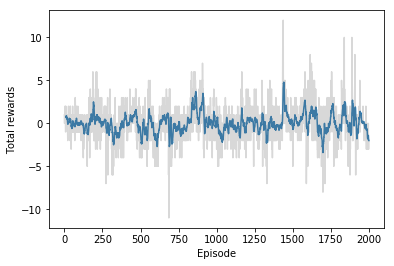

In [44]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0,0.5,'Average losses')

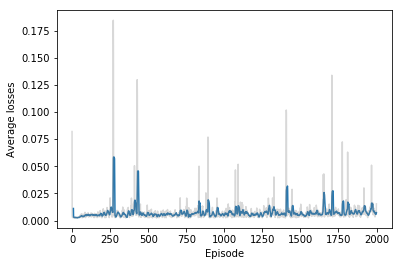

In [45]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

In [33]:
# # import gym
# # # env = gym.make('CartPole-v0')
# # env = gym.make('CartPole-v1')
# # # env = gym.make('Acrobot-v1')
# # # env = gym.make('MountainCar-v0')
# # # env = gym.make('Pendulum-v0')
# # # env = gym.make('Blackjack-v0')
# # # env = gym.make('FrozenLake-v0')
# # # env = gym.make('AirRaid-ram-v0')
# # # env = gym.make('AirRaid-v0')
# # # env = gym.make('BipedalWalker-v2')
# # # env = gym.make('Copy-v0')
# # # env = gym.make('CarRacing-v0')
# # # env = gym.make('Ant-v2') #mujoco
# # # env = gym.make('FetchPickAndPlace-v1') # mujoco required!

# with tf.Session() as sess:
#     #sess.run(tf.global_variables_initializer())
#     saver.restore(sess, 'checkpoints/model-nav.ckpt')    
#     #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
#     # Episodes/epochs
#     for _ in range(1):
#         state = env.reset()
#         total_reward = 0

#         # Steps/batches
#         #for _ in range(111111111111111111):
#         while True:
#             env.render()
#             action_logits = sess.run(model.actions_logits, feed_dict={model.states: np.reshape(state, [1, -1])})
#             action = np.argmax(action_logits)
#             state, reward, done, _ = env.step(action)
#             total_reward += reward
#             if done:
#                 break
                
#         # Closing the env
#         print('total_reward: {:.2f}'.format(total_reward))
#         env.close()